# Capstone Project: BFSI

## Data Import and Cleaning


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_demo = pd.read_csv('Demographic data.csv')
df_demo.head(10)


,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0
5,312196805,20,M,Married,1.0,39.0,Bachelor,SAL,NaN,116,52,0.0
6,532217204,42,M,Married,2.0,55.0,Professional,SAL,Rented,104,41,0.0
7,74788849,34,M,Married,2.0,49.0,Masters,SE_PROF,Rented,108,40,0.0
8,782743811,30,M,Married,3.0,48.0,Phd,SAL,Rented,115,58,0.0
9,96964957,22,M,Single,1.0,38.0,Bachelor,SE_PROF,Rented,111,57,0.0


In [4]:
df_credit = pd.read_csv('Credit Bureau data.csv')
df_credit.head(10)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0
5,312196805,0,0,0,0,0,0,10.0,0.0,0,0,0,0,0,0.0,2569.0,1,0,0.0
6,532217204,0,0,0,0,0,0,11.0,0.0,1,0,0,0,0,1.0,3005535.0,4,0,0.0
7,74788849,0,0,0,0,0,0,13.0,1.0,1,0,0,0,0,1.0,3004790.0,3,0,0.0
8,782743811,0,0,0,0,0,1,9.0,0.0,0,0,0,0,0,1.0,3007428.0,2,0,0.0
9,96964957,0,0,0,0,0,0,6.0,1.0,1,0,0,0,0,0.0,170860.0,1,1,0.0


In [5]:
#Review Application ID column in Demographic Data
print(df_demo.shape)
len(df_demo['Application ID'].unique())

(71295, 12)


71292

In [6]:
df_demo['Application ID'].value_counts().head(5)

653287861    2
671989187    2
765011468    2
426119166    1
1909617      1
Name: Application ID, dtype: int64

In [7]:
#Remove Ambigous Values from demographic data
df_demo = df_demo[~df_demo['Application ID'].isin([653287861,671989187,765011468])]
print(df_demo.shape)
print(len(df_demo['Application ID'].unique()))
df_demo['Application ID'].value_counts().head(5)

(71289, 12)
71289


426119166    1
217779626    1
739351398    1
407526217    1
675138412    1
Name: Application ID, dtype: int64

In [8]:
##Review Application ID column in Credit Bureau Data
print(df_credit.shape)
len(df_credit['Application ID'].unique())

(71295, 19)


71292

In [9]:
df_credit['Application ID'].value_counts().head(5)

653287861    2
671989187    2
765011468    2
426119166    1
1909617      1
Name: Application ID, dtype: int64

In [10]:
#Remove Ambigous Values from Credit Bureau data
df_credit = df_credit[~df_credit['Application ID'].isin([653287861,671989187,765011468])]
print(df_credit.shape)
print(len(df_credit['Application ID'].unique()))
df_credit['Application ID'].value_counts().head(5)

(71289, 19)
71289


426119166    1
217779626    1
739351398    1
407526217    1
675138412    1
Name: Application ID, dtype: int64

In [11]:
df = df_demo.merge(df_credit, on ='Application ID', how = 'inner')
df.shape

(71289, 30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71289 entries, 0 to 71288
Data columns (total 30 columns):
Application ID                                                     71289 non-null int64
Age                                                                71289 non-null int64
Gender                                                             71287 non-null object
Marital Status (at the time of application)                        71283 non-null object
No of dependents                                                   71286 non-null float64
Income                                                             71289 non-null float64
Education                                                          71170 non-null object
Profession                                                         71275 non-null object
Type of residence                                                  71281 non-null object
No of months in current residence                                  71289 non-null int64
No

In [13]:
df['Performance Tag'] = df['Performance Tag_x'].fillna(df['Performance Tag_y'])
df[df['Performance Tag'].isnull()]

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y,Performance Tag
69597,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,...,3,7,2,4,0.0,1309623.0,13,0,NaN,NaN
69598,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,...,3,4,3,5,0.0,775626.0,7,0,NaN,NaN
69599,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,...,2,4,0,3,0.0,732602.0,8,0,NaN,NaN
69600,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,...,1,4,4,5,0.0,842057.0,8,0,NaN,NaN
69601,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,...,2,3,3,6,0.0,786997.0,7,1,NaN,NaN
69602,216681850,46,M,Married,5.0,18.0,Bachelor,SE,Rented,61,...,1,4,1,4,0.0,980661.0,6,1,NaN,NaN
69603,413788459,29,M,Married,2.0,7.0,Professional,SE_PROF,Rented,38,...,1,2,1,2,0.0,363216.0,4,0,NaN,NaN
69604,666004143,57,M,Married,3.0,16.0,Professional,SAL,Rented,59,...,2,6,1,2,0.0,1178250.0,10,0,NaN,NaN
69605,505448697,39,F,Married,3.0,4.5,Bachelor,SAL,Rented,75,...,1,4,3,4,0.0,711895.0,9,0,NaN,NaN
69606,16819814,43,M,Married,4.0,24.0,Bachelor,SAL,Rented,6,...,3,5,3,5,0.0,1010968.0,11,0,NaN,NaN


In [14]:
df.drop(['Performance Tag_x','Performance Tag_y'], axis =1,inplace=True)
df = df[~df['Performance Tag'].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69864 entries, 0 to 71288
Data columns (total 29 columns):
Application ID                                                     69864 non-null int64
Age                                                                69864 non-null int64
Gender                                                             69862 non-null object
Marital Status (at the time of application)                        69858 non-null object
No of dependents                                                   69861 non-null float64
Income                                                             69864 non-null float64
Education                                                          69746 non-null object
Profession                                                         69851 non-null object
Type of residence                                                  69856 non-null object
No of months in current residence                                  69864 non-null int64
No

## Missing Value Imputation and Variable Selection

Missing Value would be imputed using **Weight of Evidence(woe)** and important variables would be identified using **Infomratiion Value (IV)**

In [15]:
round((df.isnull().sum()/len(df.index))*100,2)

Application ID                                                     0.00
Age                                                                0.00
Gender                                                             0.00
Marital Status (at the time of application)                        0.01
No of dependents                                                   0.00
Income                                                             0.00
Education                                                          0.17
Profession                                                         0.02
Type of residence                                                  0.01
No of months in current residence                                  0.00
No of months in current company                                    0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                    

In [16]:
df['Marital Status (at the time of application)'].value_counts()

Married    59542
Single     10316
Name: Marital Status (at the time of application), dtype: int64

In [17]:
#Impute missing values of 'Marital Status (at the time of application)'
df['Marital Status (at the time of application)'].fillna('Married',inplace=True)

In [18]:
df['Type of residence'].value_counts()

Rented                 52276
Owned                  14003
Living with Parents     1777
Company provided        1602
Others                   198
Name: Type of residence, dtype: int64

In [19]:
#Impute missing values of 'Type of residence'
df['Type of residence'].fillna('Rented',inplace=True)

In [20]:
df['Profession '].value_counts()

SAL        39670
SE_PROF    16256
SE         13925
Name: Profession , dtype: int64

In [21]:
#Impute missing values of 'Profession'
df['Profession '].fillna('SAL',inplace=True)

In [22]:
df['Education'].value_counts()

Professional    24383
Masters         23481
Bachelor        17300
Phd              4463
Others            119
Name: Education, dtype: int64

In [23]:
# As Masters and Professional is similar Education Replacing one with other.
df['Education'] = df['Education'].replace('Professional','Masters')
df['Education'].value_counts()

Masters     47864
Bachelor    17300
Phd          4463
Others        119
Name: Education, dtype: int64

In [24]:
#Impute missing values of 'Education'
df['Education'].fillna('Masters',inplace=True)

In [25]:
#df['Presence of open home loan'].value_counts()

In [26]:
#Impute missing values of 'Presence of open home loan'
df['Presence of open home loan'].fillna(0.0,inplace=True)

In [27]:
print('Mean of Outstanding Balance=',df['Outstanding Balance'].mean())
print('Median of Outstanding Balance=',df['Outstanding Balance'].median())

Mean of Outstanding Balance= 1253409.678669962
Median of Outstanding Balance= 774242.0


In [28]:
#Impute missing values of 'Outstanding Balance'
df['Outstanding Balance'].fillna(774242.0,inplace=True)

In [29]:
#NUll values for 'Avgas CC Utilization in last 12 months' indicate no Credit Card hence imputing such values to -1
df['Avgas CC Utilization in last 12 months'].fillna(-1,inplace=True)

In [30]:
round((df.isnull().sum()/len(df.index))*100,2)

Application ID                                                     0.0
Age                                                                0.0
Gender                                                             0.0
Marital Status (at the time of application)                        0.0
No of dependents                                                   0.0
Income                                                             0.0
Education                                                          0.0
Profession                                                         0.0
Type of residence                                                  0.0
No of months in current residence                                  0.0
No of months in current company                                    0.0
No of times 90 DPD or worse in last 6 months                       0.0
No of times 60 DPD or worse in last 6 months                       0.0
No of times 30 DPD or worse in last 6 months                       0.0
No of 

#### For performing Weight of Evidence (WOE) and Information Value analysis we need to create bins and calcluate the WOE and IV for each bin. Function 'iv_woe' is being created for the calculation

Source: [Listendata](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html)

In [31]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>bins):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [32]:
iv, woe = iv_woe(data = df, target = 'Performance Tag', bins=10, show_woe = True)

Information value of Application ID is 0.00148
         Variable                       Cutoff     N  Events  % of Events  \
0  Application ID     (100449.999, 99488056.4]  6987   292.0     0.099084   
1  Application ID    (99488056.4, 199459947.4]  6986   276.0     0.093655   
2  Application ID   (199459947.4, 298561024.0]  6986   305.0     0.103495   
3  Application ID   (298561024.0, 399368856.6]  6987   295.0     0.100102   
4  Application ID   (399368856.6, 497955643.5]  6986   312.0     0.105870   
5  Application ID   (497955643.5, 599089634.8]  6986   281.0     0.095351   
6  Application ID   (599089634.8, 699936204.5]  6987   297.0     0.100780   
7  Application ID   (699936204.5, 798890993.6]  6986   305.0     0.103495   
8  Application ID   (798890993.6, 899547674.7]  6986   285.0     0.096709   
9  Application ID  (899547674.7, 1000084142.0]  6987   299.0     0.101459   

   Non-Events  % of Non-Events       WoE            IV  
0      6695.0         0.100049 -0.009697  9.3625

Information value of No of months in current company is 0.022821
                          Variable         Cutoff     N  Events  % of Events  \
0  No of months in current company   (2.999, 6.0]  7655   356.0     0.120801   
1  No of months in current company    (6.0, 13.0]  6847   344.0     0.116729   
2  No of months in current company   (13.0, 20.0]  6878   350.0     0.118765   
3  No of months in current company   (20.0, 27.0]  7035   297.0     0.100780   
4  No of months in current company   (27.0, 34.0]  7038   278.0     0.094333   
5  No of months in current company   (34.0, 41.0]  7215   310.0     0.105192   
6  No of months in current company   (41.0, 48.0]  7224   264.0     0.089583   
7  No of months in current company   (48.0, 54.0]  6181   204.0     0.069223   
8  No of months in current company   (54.0, 62.0]  7652   259.0     0.087886   
9  No of months in current company  (62.0, 133.0]  6139   285.0     0.096709   

   Non-Events  % of Non-Events       WoE            IV

Information value of No of PL trades opened in last 12 months is 0.258546
                                   Variable         Cutoff      N  Events  \
0  No of PL trades opened in last 12 months  (-0.001, 1.0]  32463   704.0   
1  No of PL trades opened in last 12 months     (1.0, 2.0]   6830   366.0   
2  No of PL trades opened in last 12 months     (2.0, 3.0]   8130   507.0   
3  No of PL trades opened in last 12 months     (3.0, 4.0]   7902   535.0   
4  No of PL trades opened in last 12 months     (4.0, 5.0]   6189   391.0   
5  No of PL trades opened in last 12 months     (5.0, 6.0]   4023   243.0   
6  No of PL trades opened in last 12 months    (6.0, 12.0]   4327   201.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.238887     31759.0         0.474603 -0.686488  0.161816  
1     0.124194      6464.0         0.096597  0.251295  0.006935  
2     0.172039      7623.0         0.113917  0.412251  0.023961  
3     0.181541      7367.0         0.110092  

In [33]:
iv

,Variable,IV
0,Application ID,0.001480
0,Age,0.004142
0,Gender,0.000325
0,Marital Status (at the time of application),0.000096
0,No of dependents,0.002652
0,Income,0.042842
0,Education,0.000669
0,Profession,0.002228
0,Type of residence,0.000925
0,No of months in current residence,0.070716


In [34]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Application ID,"(100449.999, 99488056.4]",6987,292.0,0.099084,6695.0,0.100049,-0.009697,9.362571e-06
1,Application ID,"(99488056.4, 199459947.4]",6986,276.0,0.093655,6710.0,0.100273,-0.068288,4.519922e-04
2,Application ID,"(199459947.4, 298561024.0]",6986,305.0,0.103495,6681.0,0.099840,0.035954,1.314117e-04
3,Application ID,"(298561024.0, 399368856.6]",6987,295.0,0.100102,6692.0,0.100004,0.000973,9.465233e-08
4,Application ID,"(399368856.6, 497955643.5]",6986,312.0,0.105870,6674.0,0.099735,0.059694,3.662149e-04
5,Application ID,"(497955643.5, 599089634.8]",6986,281.0,0.095351,6705.0,0.100199,-0.049589,2.403841e-04
6,Application ID,"(599089634.8, 699936204.5]",6987,297.0,0.100780,6690.0,0.099975,0.008028,6.469702e-06
7,Application ID,"(699936204.5, 798890993.6]",6986,305.0,0.103495,6681.0,0.099840,0.035954,1.314117e-04
8,Application ID,"(798890993.6, 899547674.7]",6986,285.0,0.096709,6701.0,0.100139,-0.034858,1.195774e-04
9,Application ID,"(899547674.7, 1000084142.0]",6987,299.0,0.101459,6688.0,0.099945,0.015039,2.277475e-05


In [35]:
# Checking Variable Predictiveness
iv['Variable Predictiveness'] = iv.IV.apply(lambda x: 'Not useful for prediction' if x <0.02 
                                            else ('Weak predictive Power' if x<0.1 
                                                  else('Medium predictive Power' if x<0.3 
                                                       else('Strong predictive Power' if x<0.5 else 'Suspicious Predictive Power'
                                                           ))))

iv.sort_values(by='IV')

,Variable,IV,Variable Predictiveness
0,Marital Status (at the time of application),0.000096,Not useful for prediction
0,Gender,0.000325,Not useful for prediction
0,Education,0.000669,Not useful for prediction
0,Type of residence,0.000925,Not useful for prediction
0,Application ID,0.001480,Not useful for prediction
0,Presence of open auto loan,0.001655,Not useful for prediction
0,Profession,0.002228,Not useful for prediction
0,No of dependents,0.002652,Not useful for prediction
0,Age,0.004142,Not useful for prediction
0,Presence of open home loan,0.016970,Not useful for prediction


#### Information Value helps us identify which variables are useful for building predictive model and which all can be ignored. 

In [36]:
#Create New woe_data dataframe
woe_data = df[['Application ID','Performance Tag']]

In [37]:
woe_data['Income_woe'] = df['Income'].apply(lambda x: 0.353130057 if x <=6.0 
                                            else (0.139753757 if x<=11.0 
                                                  else(0.0790616 if x<=17.0 
                                                       else(0.115900402 if x<=22.0 
                                                            else (-0.012982496 if x<=27.0
                                                                 else (0.034372241 if x<=32.0
                                                                      else (-0.146555121 if x<=37.0
                                                                           else (-0.272908782 if x<=42.0
                                                                                else(-0.169390801 if x<=49.0
                                                                                    else (-0.385540134 if x<=60.0 else 0))))))))))

In [38]:
woe_data['No of months in current company_woe'] = df['No of months in current company'].apply(lambda x: 0.102103441111244 if x <=6 else (0.183288111215093 if x<=13 else(0.196742599550363 if x<=20 else(0.000879056547048162 if x<=27 else (-0.0684917136355258 if x<=34 else (0.019236573346646 if x<=41 else (-0.149320308471302 if x<=48 else (-0.254888713269191 if x<=54 else(-0.228795482146715 if x<=62 else (0.100274054727665 if x<=133 else 0))))))))))

woe_data['No of months in current residence_woe'] = df['No of months in current residence'].apply(lambda x: -0.252889982527929 if x <=10 else (0.473190441399093 if x<=29 else(0.302971674557175 if x<=50 else(0.122686777275404 if x<=73 else (0.1214602664155 if x<=98 else (-0.0691818107694347 if x<=126 else 0))))))

woe_data['No of Inquiries in last 6 months (excluding home & auto loans)_woe'] = df['No of Inquiries in last 6 months (excluding home & auto loans)'].apply(lambda x: -0.320076136562281 if x <=1 else (0.216134127149077 if x<=2 else(0.554893012312923 if x<=3 else(0.328824343811406 if x<=5 else (-0.116134890883569 if x<=10 else 0)))))

woe_data['No of times 90 DPD or worse in last 6 months_woe'] = df['No of times 90 DPD or worse in last 6 months'].apply(lambda x: -0.260685135548109 if x <=0 else (0.586843475870755 if x<=1 else(0.810129917863633 if x<=2 else(1.03780373256167 if x<=3 else 0))))

woe_data['No of times 90 DPD or worse in last 12 months_woe'] = df['No of times 90 DPD or worse in last 12 months'].apply(lambda x: -0.356637058986341 if x <=0 else (0.508778574492378 if x<=1 else(0.669859999549965 if x<=2 else(0.885508054039256 if x<=3 else (0.957701626592848 if x<=4 else (1.2981160496598 if x<=5 else 0))))))

woe_data['No of times 60 DPD or worse in last 12 months_woe'] = df['No of times 60 DPD or worse in last 12 months'].apply(lambda x: -0.351920975582949 if x <=0 else (0.214109000025909 if x<=1 else(0.61266134392272 if x<=2 else(0.752694507388024 if x<=3 else (0.884486765366028 if x<=4 else (0.814540068341185 if x<=5 else (1.10264722050181 if x<=6 else (0.483608012095588 if x<=7 else 0))))))))

woe_data['No of times 30 DPD or worse in last 12 months_woe'] = df['No of times 30 DPD or worse in last 12 months'].apply(lambda x: -0.376394913542363 if x <=0 else (0.0709980535873612 if x<=1 else(0.592070507751418 if x<=2 else(0.738671932144005 if x<=3 else (0.808014603922773 if x<=4 else (0.972733922276466 if x<=5 else (0.937205605954213 if x<=6 else (0.956212423041381 if x<=7 else(0.771290084547369 if x<=8 else (2.4295181611509 if x<=9 else 0))))))))))

woe_data['Avgas CC Utilization in last 12 months_woe'] = df['Avgas CC Utilization in last 12 months'].apply(lambda x: -0.702930195353144 if x <=5 else (-0.778505338888259 if x<=7 else(-0.728508878847169 if x<=9 else(-0.616344759346973 if x<=11 else (-0.468046747385126 if x<=14 else (-0.0788972919556779 if x<=21 else (0.475000937442843 if x<=37 else (0.568787312177694 if x<=52 else(0.590292154683922 if x<=72 else (0.360495810221859 if x<=113 else 0))))))))))

woe_data['No of trades opened in last 6 months_woe'] = df['No of trades opened in last 6 months'].apply(lambda x: -0.543230882128141 if x <=1 else (0.232888369377598 if x<=2 else(0.435064144368019 if x<=3 else(0.524217124586081 if x<=4 else (0.332237974995496 if x<=5 else (-0.000368222759725689 if x<=12 else 0))))))

woe_data['No of trades opened in last 12 months_woe'] = df['No of trades opened in last 12 months'].apply(lambda x: -0.893935866527796 if x <=1 else (-0.816404313471714 if x<=2 else(0.0035540469963514 if x<=3 else(0.0173028345777822 if x<=4 else (0.316818227149838 if x<=6 else (0.57573204891483 if x<=8 else (0.484126998354101 if x<=10 else (0.403396257003848 if x<=13 else(-0.0542830799181423 if x<=28 else 0)))))))))

woe_data['No of PL trades opened in last 6 months_woe'] = df['No of PL trades opened in last 6 months'].apply(lambda x: -0.649190775270987 if x <=0 else (0.199394839547285 if x<=1 else(0.438390780637707 if x<=2 else(0.423570623838808 if x<=3 else (0.352617916899738 if x<=4 else (0.0449691303054253 if x<=5 else (-0.460853596745263 if x<=6 else 0)))))))

woe_data['No of PL trades opened in last 12 months_woe'] = df['No of PL trades opened in last 12 months'].apply(lambda x: -0.686487730850388 if x <=1 else (0.251295074911281 if x<=2 else(0.412251073313756 if x<=3 else(0.500166241924039 if x<=4 else (0.426104592214611 if x<=5 else (0.378247496437761 if x<=6 else (0.100906556138725 if x<=12 else 0)))))))

woe_data['No of Inquiries in last 6 months (excluding home & auto loans)_woe'] = df['No of Inquiries in last 6 months (excluding home & auto loans)'].apply(lambda x: -0.320076136562281 if x <=1 else (0.216134127149077 if x<=2 else(0.554893012312923 if x<=3 else(0.328824343811406 if x<=5 else (-0.116134890883569 if x<=10 else 0)))))

woe_data['No of Inquiries in last 12 months (excluding home & auto loans)_woe'] = df['No of Inquiries in last 12 months (excluding home & auto loans)'].apply(lambda x: -0.828286959121177 if x <=1 else (0.1422327598965 if x<=2 else(0.164304476527441 if x<=3 else(0.248060505885997 if x<=4 else (0.588354842554651 if x<=5 else (0.510276259177749 if x<=6 else (0.356480692292585 if x<=9 else (0.0345362188908883 if x<=20 else 0))))))))

woe_data['Outstanding Balance_woe'] = df['Outstanding Balance'].apply(lambda x: -0.774718660356366 if x <=6883 else (-0.89890452633513 if x<=26102.6 else(-0.134391154615221 if x<=388144.8 else(0.252949908740342 if x<=586671.4 else (0.43568729588151 if x<=774242 else (0.44139421079876 if x<=970902.2 else (0.39568130323427 if x<=1355454.9 else (-0.361233930754832 if x<=2960646.8 else(-0.842679668111186 if x<=3279458.8 else (0.297154218016723 if x<=5218801 else 0))))))))))

woe_data['Total No of Trades_woe'] = df['Total No of Trades'].apply(lambda x: -0.877730960095776 if x <=2 else (-0.701950951676068 if x<=3 else(-0.44789739778005 if x<=4 else(-0.0488453900481629 if x<=5 else (0.129256440202102 if x<=6 else (0.296667509445338 if x<=7 else (0.512570106589467 if x<=9 else (0.489203997599709 if x<=11 else(0.375911256719395 if x<=20 else (-0.065827637781804 if x<=44 else 0))))))))))

woe_data['Gender_woe'] = df['Gender'].apply(lambda x: 0.032099586 if x == 'F' else -0.0101242255056953)

woe_data['Marital Status_woe'] = df['Marital Status (at the time of application)'].apply(lambda x: -0.00410220615927695 if x == 'Married' else 0.023383179)

woe_data['Education_woe'] = df['Education'].apply(lambda x: 0.0173899371794761 if x =='Bachelor' else (-0.0295567940235746 if x=='Phd' else(0.492576682078348 if x<='Others' else 0.0173899371794761)))

woe_data['Profession_woe'] = df['Profession '].apply(lambda x: -0.028374532 if x =='SAL' else (0.0913792161348797 if x=='SE' else (-0.0133425178893068 if x=='SE_PROF' else 0)))

woe_data['Type of residence_woe'] = df['Type of residence'].apply(lambda x: 0.080755577 if x =='Company provided' else (0.068074711 if x=='Living with Parents' else (-0.530586935 if x=='Others' else (0.004103764 if x=='Owned' else (-0.004478593 if x=='Rented' else 0)))))

woe_data['Presence of open home loan_woe'] = df['Presence of open home loan'].apply(lambda x: 0.071793548 if x == 0 else -0.236702765459434)
                                                                  
woe_data['Presence of open auto loan_woe'] = df['Presence of open auto loan'].apply(lambda x: 0.0119725196296035 if x == 0 else -0.138237231122708)

woe_data['No of dependents_woe'] = df['No of dependents'].apply(lambda x: 0.0399955562040954 if x ==1 else (-0.0852425159840481 if x==2 else (0.0541326676640284 if x==3 else (-0.0252071236593371 if x==4 else (0.00430120637759924 if x==5 else 0)))))

woe_data['Age_woe'] = df['Age'].apply(lambda x: -0.016278145 if x <=31 
                                            else (0.031622888 if x<=36
                                                  else(0.062638717 if x<=39 
                                                       else(0.047189136 if x<=42
                                                            else (-0.044689976 if x<=45
                                                                 else (0.032839804 if x<=48
                                                                      else (-0.073328964 if x<=51
                                                                           else (-0.149292499 if x<=54
                                                                                else(0.073882698 if x<=58
                                                                                    else (0.011283204 if x<=65 else 0))))))))))

In [39]:
woe_data.head()

,Application ID,Performance Tag,Income_woe,No of months in current company_woe,No of months in current residence_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of times 90 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,...,Total No of Trades_woe,Gender_woe,Marital Status_woe,Education_woe,Profession_woe,Type of residence_woe,Presence of open home loan_woe,Presence of open auto loan_woe,No of dependents_woe,Age_woe
0,954457215,0.0,-0.272909,-0.228795,-0.069182,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.447897,0.032100,-0.004102,0.017390,-0.028375,-0.004479,-0.236703,0.011973,-0.085243,0.032840
1,432830445,0.0,-0.385540,-0.149320,-0.069182,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.048845,-0.010124,-0.004102,0.492577,-0.013343,-0.004479,0.071794,0.011973,-0.025207,-0.016278
2,941387308,0.0,-0.169391,-0.254889,-0.069182,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.877731,-0.010124,0.023383,0.017390,-0.013343,-0.004479,-0.236703,0.011973,-0.085243,0.031623
3,392161677,0.0,-0.385540,-0.254889,0.121460,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.447897,-0.010124,-0.004102,0.017390,0.091379,-0.004479,-0.236703,-0.138237,0.039996,-0.044690
4,182011211,0.0,-0.169391,-0.149320,-0.069182,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.447897,0.032100,-0.004102,0.492577,-0.028375,-0.004479,-0.236703,0.011973,0.004301,0.031623


## Exploratory Data Analysis

In [40]:
woe_data.describe(percentiles = [0.25,0.50,0.75,0.95])

,Application ID,Performance Tag,Income_woe,No of months in current company_woe,No of months in current residence_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of times 90 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,...,Total No of Trades_woe,Gender_woe,Marital Status_woe,Education_woe,Profession_woe,Type of residence_woe,Presence of open home loan_woe,Presence of open auto loan_woe,No of dependents_woe,Age_woe
count,6.986400e+04,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,...,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000
mean,4.992094e+08,0.042182,-0.019676,-0.010544,-0.031589,-0.050767,-0.069249,-0.093585,-0.081285,-0.093522,...,-0.111986,-0.000148,-0.000044,0.341555,-0.001008,-0.000450,-0.008002,-0.000775,-0.001221,-0.001918
std,2.885582e+08,0.201006,0.207756,0.152695,0.257165,0.325786,0.365271,0.429342,0.401281,0.426574,...,0.509957,0.017936,0.009751,0.224772,0.046498,0.032916,0.135091,0.041861,0.051853,0.065301
min,1.004500e+05,0.000000,-0.385540,-0.254889,-0.252890,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.877731,-0.010124,-0.004102,-0.029557,-0.028375,-0.530587,-0.236703,-0.138237,-0.085243,-0.149292
25%,2.485587e+08,0.000000,-0.169391,-0.149320,-0.252890,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.701951,-0.010124,-0.004102,0.017390,-0.028375,-0.004479,-0.236703,0.011973,-0.025207,-0.044690
50%,4.979556e+08,0.000000,0.034372,0.000879,-0.252890,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.048845,-0.010124,-0.004102,0.492577,-0.028375,-0.004479,0.071794,0.011973,0.004301,0.031623
75%,7.498606e+08,0.000000,0.115900,0.102103,0.122687,0.216134,-0.260685,0.508779,0.214109,0.070998,...,0.375911,-0.010124,-0.004102,0.492577,-0.013343,-0.004479,0.071794,0.011973,0.039996,0.047189
95%,9.494125e+08,0.000000,0.353130,0.196743,0.473190,0.554893,0.586843,0.669860,0.752695,0.738672,...,0.512570,0.032100,0.023383,0.492577,0.091379,0.004104,0.071794,0.011973,0.054133,0.073883
max,1.000084e+09,1.000000,0.353130,0.196743,0.473190,0.554893,1.037804,1.298116,1.102647,2.429518,...,0.512570,0.032100,0.023383,0.492577,0.091379,0.080756,0.071794,0.011973,0.054133,0.073883


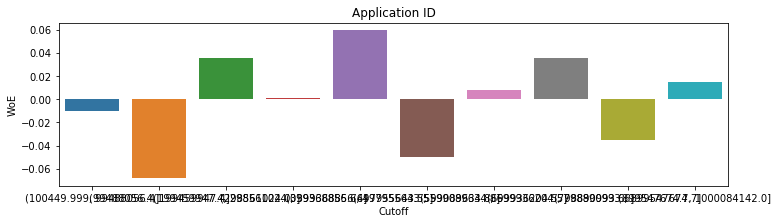

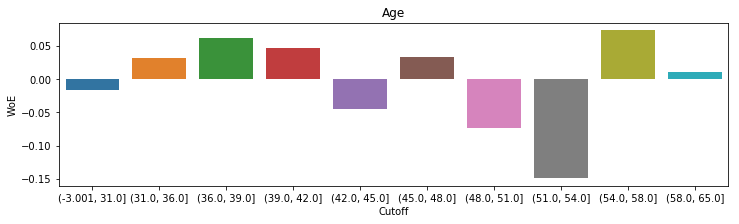

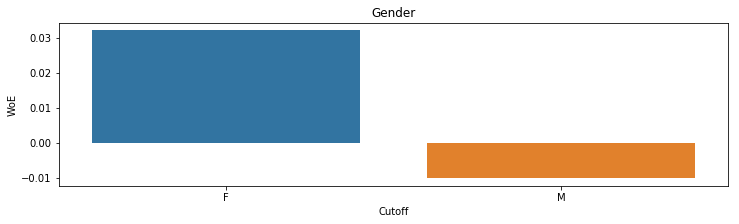

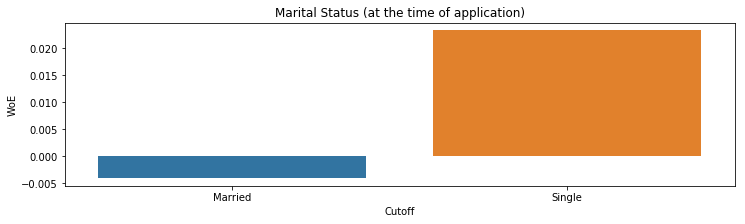

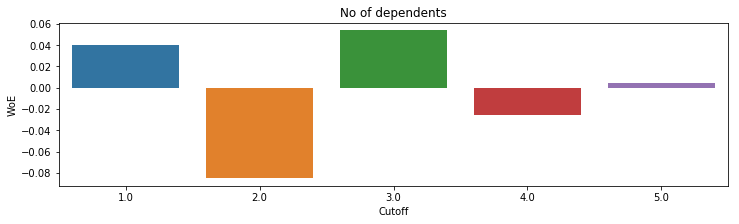

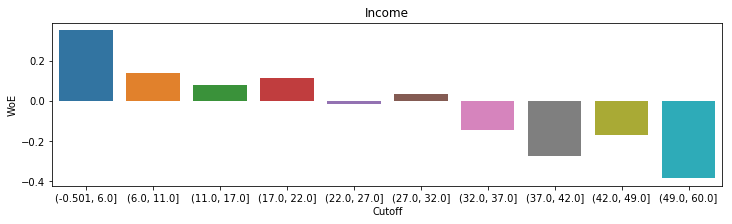

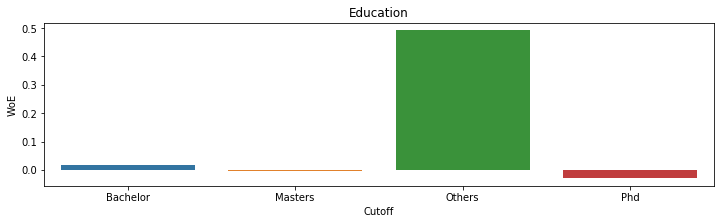

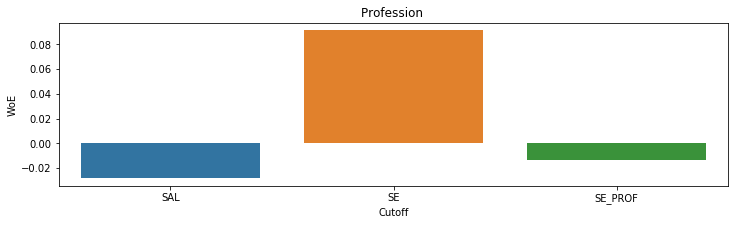

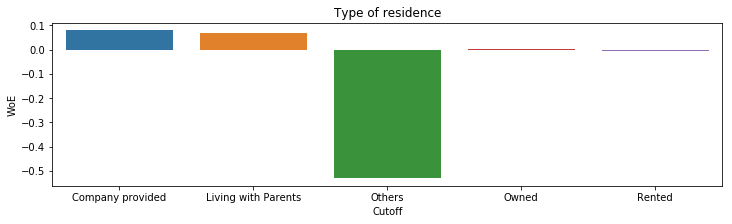

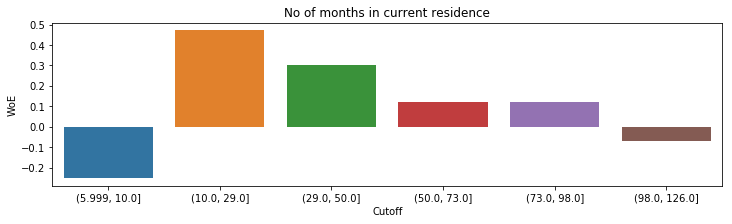

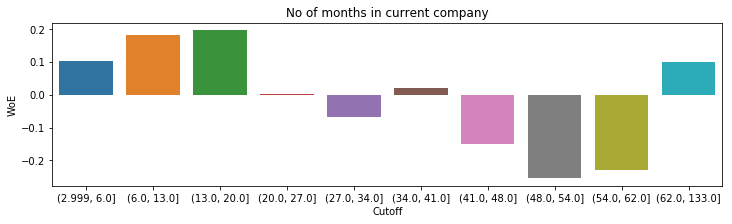

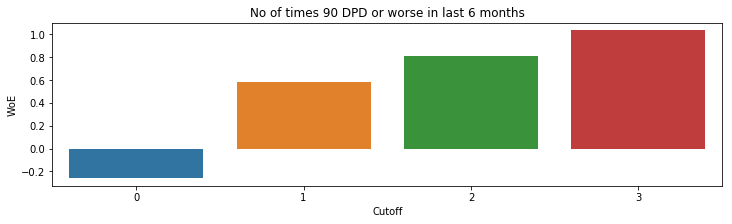

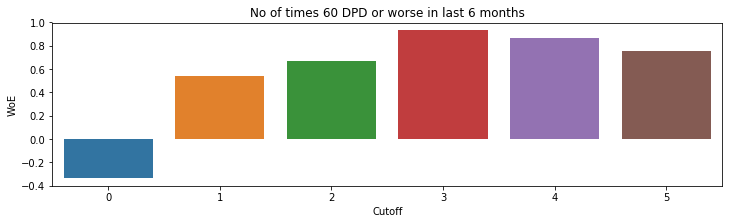

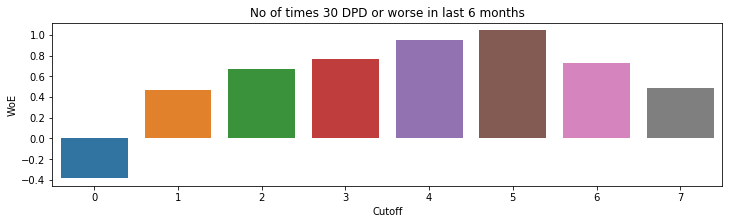

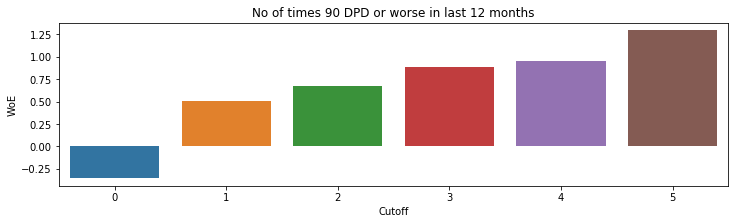

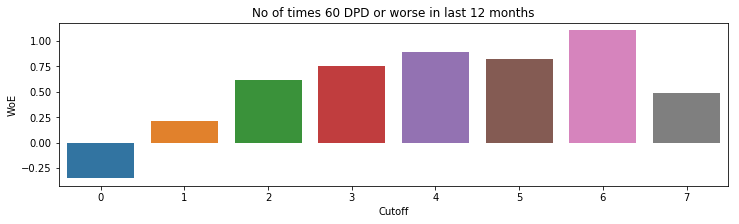

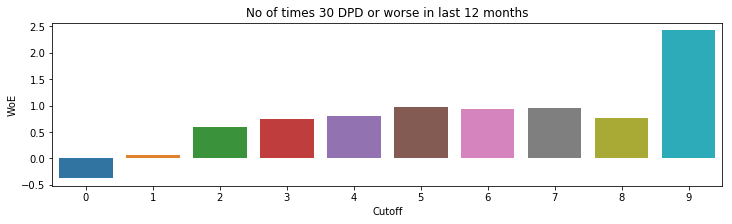

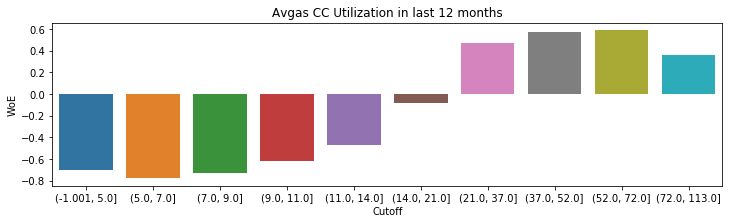

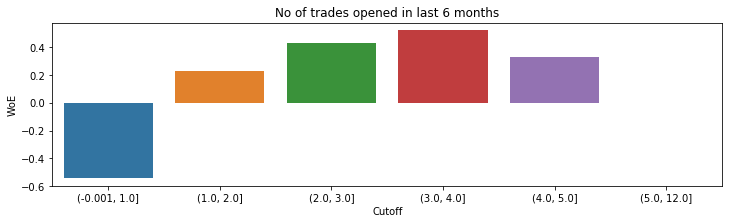

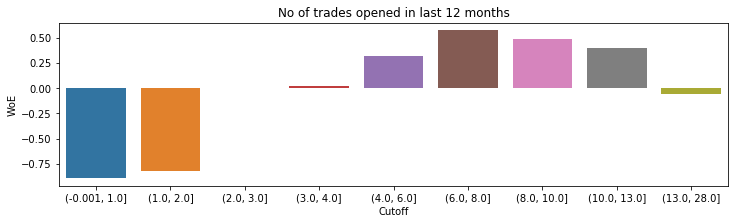

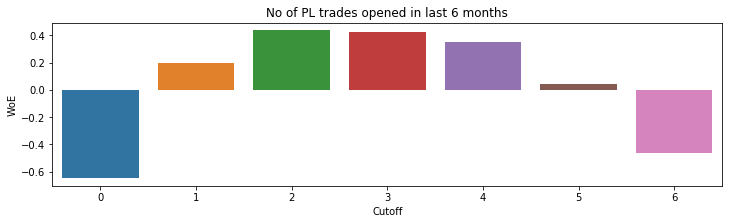

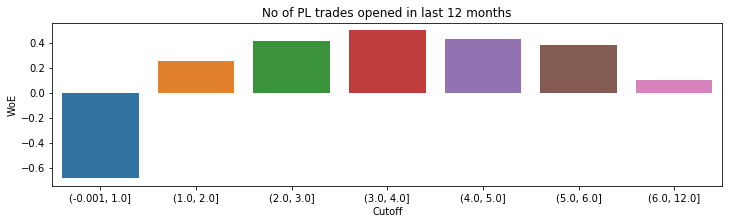

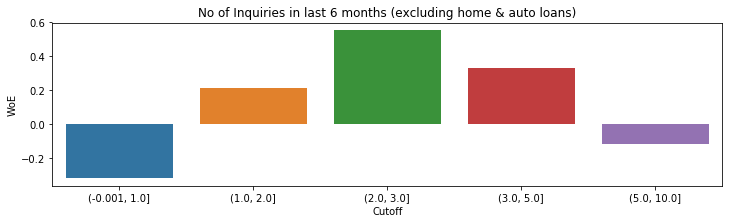

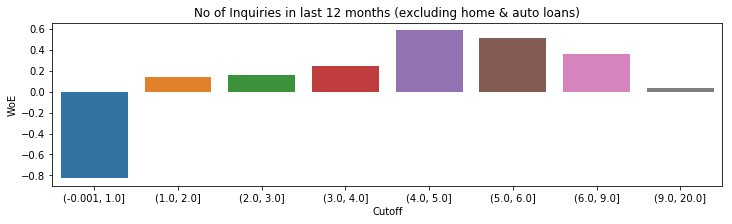

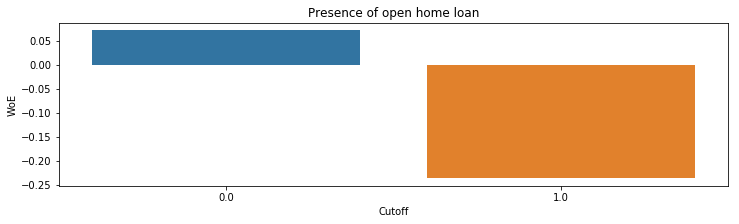

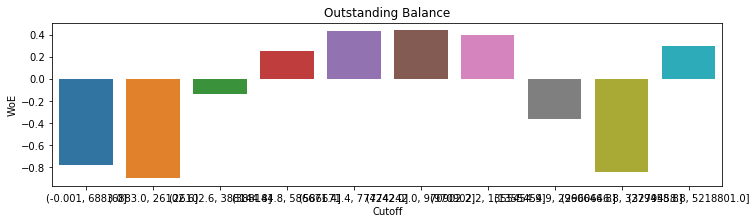

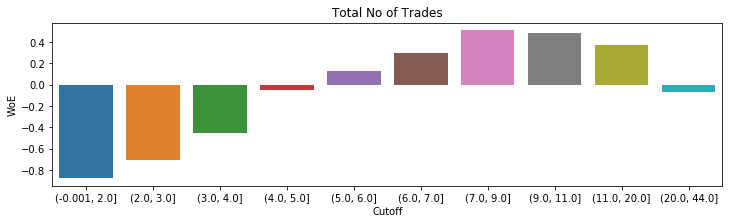

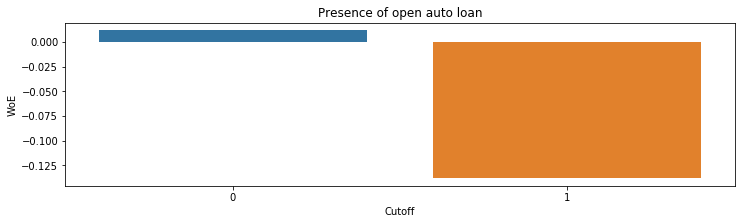

In [41]:
# Plotting WOE graphs
for i,k in enumerate(woe['Variable'].unique()):
    plt.figure(figsize=[12,3])
    plt.title(k)
    sns.barplot(x='Cutoff',y='WoE', data=woe[woe['Variable']==k])

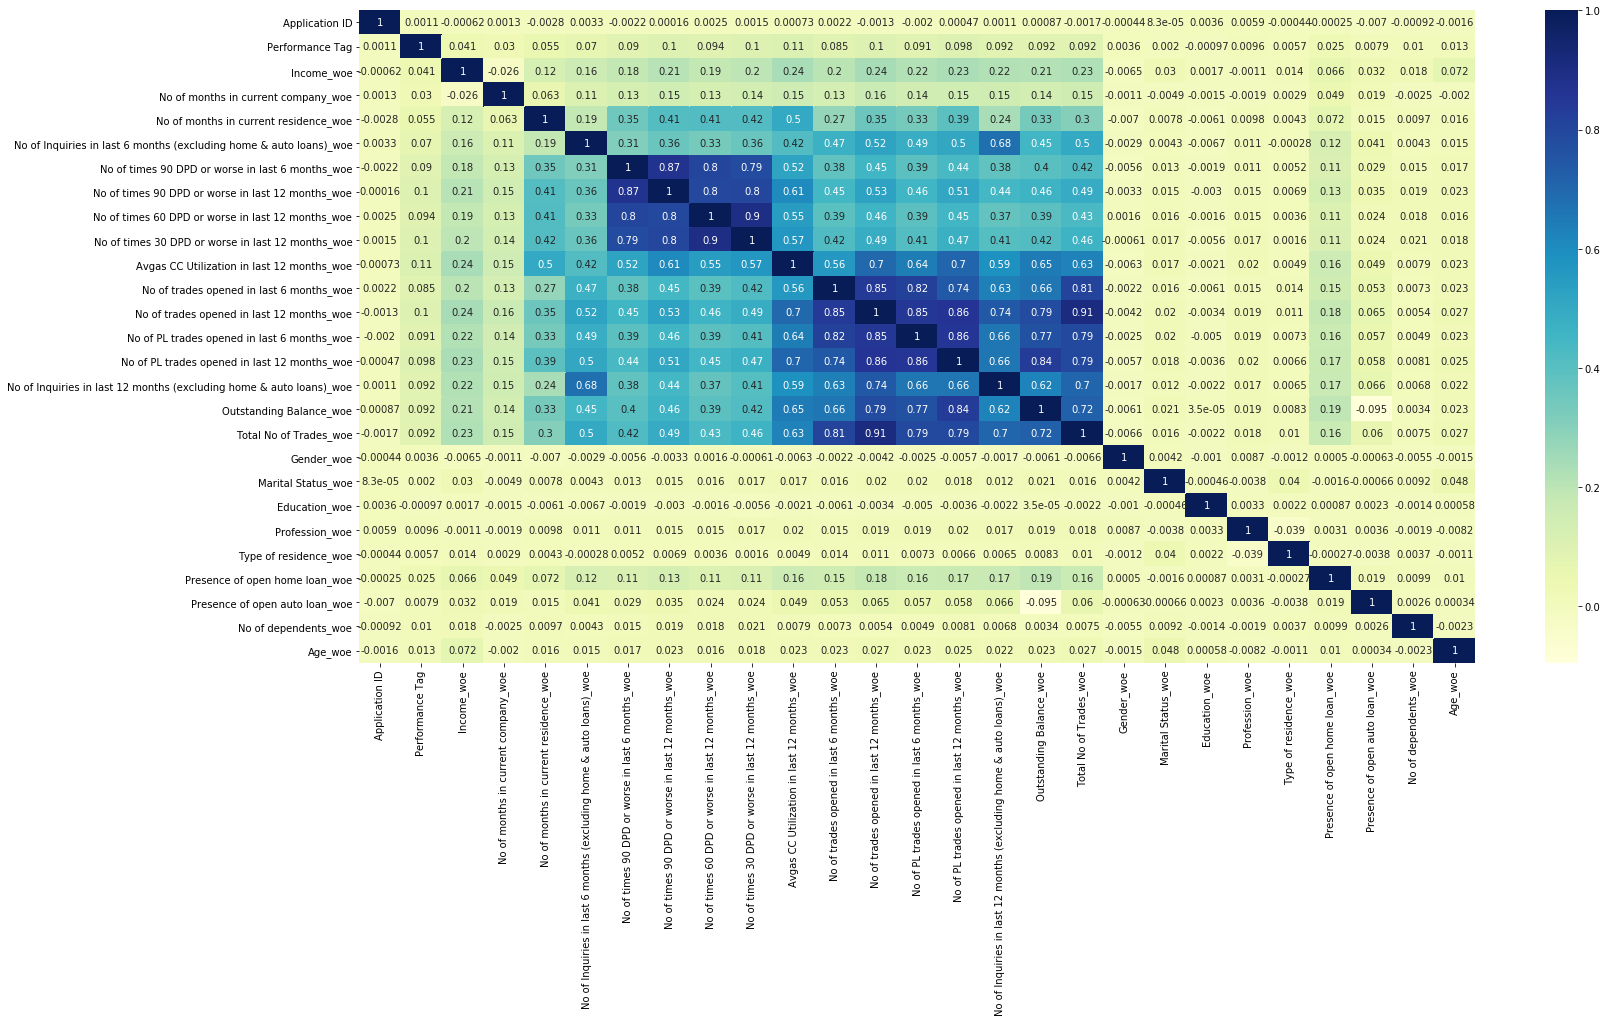

In [42]:
plt.figure(figsize=(25,12))
sns.heatmap(woe_data.corr(), annot=True, cmap="YlGnBu")

From the corelation matrix we can see that 30,60 and 90 days feature are corelated to each other similarly the 6months and 90 months features are also corelated to each other

#### Considering the high number of corelated fetaures it would be good to use PCA for feature enginering to handle multicollinearity

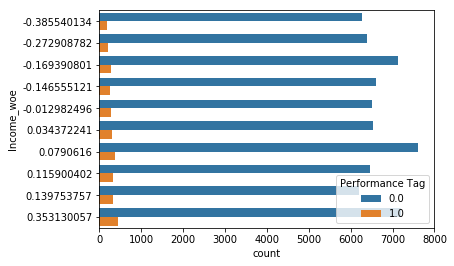

In [43]:
sns.countplot(y='Income_woe',data = woe_data, hue='Performance Tag')


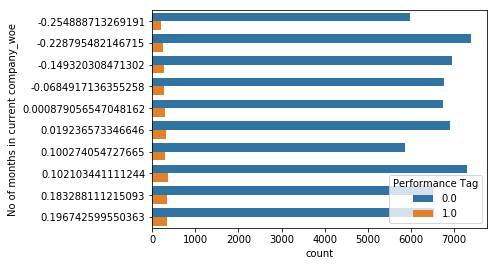

In [44]:
sns.countplot(y='No of months in current company_woe',data = woe_data, hue='Performance Tag')


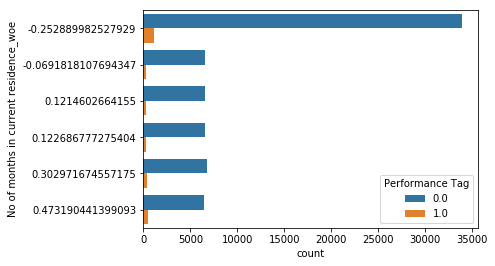

In [45]:
sns.countplot(y='No of months in current residence_woe',data = woe_data, hue='Performance Tag')


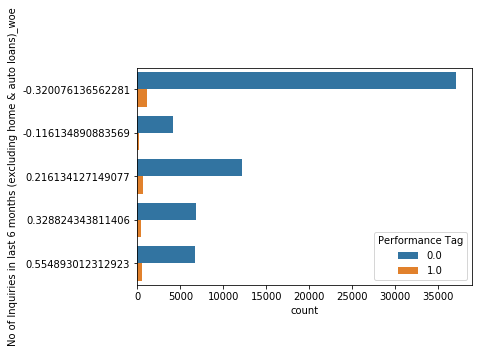

In [46]:
sns.countplot(y='No of Inquiries in last 6 months (excluding home & auto loans)_woe',data = woe_data, hue='Performance Tag')


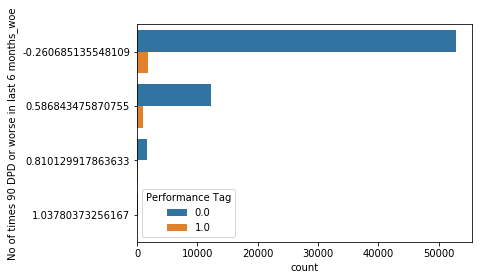

In [47]:
sns.countplot(y='No of times 90 DPD or worse in last 6 months_woe',data = woe_data, hue='Performance Tag')


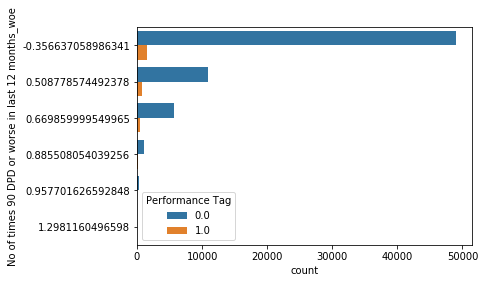

In [48]:
sns.countplot(y='No of times 90 DPD or worse in last 12 months_woe',data = woe_data, hue='Performance Tag')


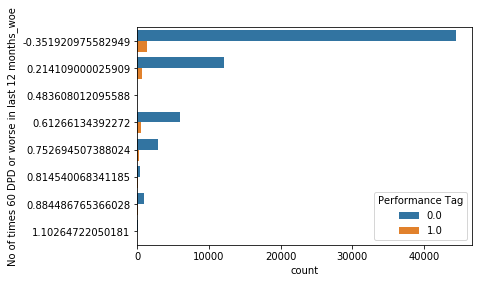

In [49]:
sns.countplot(y='No of times 60 DPD or worse in last 12 months_woe',data = woe_data, hue='Performance Tag')


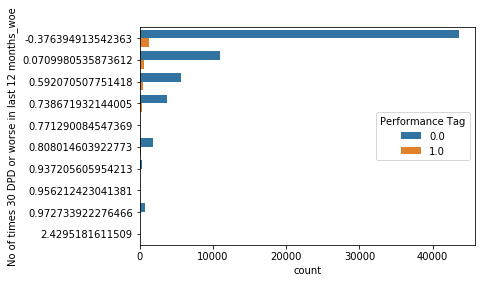

In [50]:
sns.countplot(y='No of times 30 DPD or worse in last 12 months_woe',data = woe_data, hue='Performance Tag')


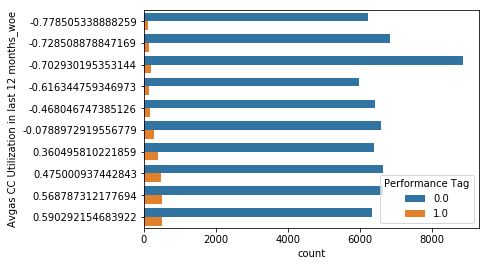

In [51]:
sns.countplot(y='Avgas CC Utilization in last 12 months_woe',data = woe_data, hue='Performance Tag')


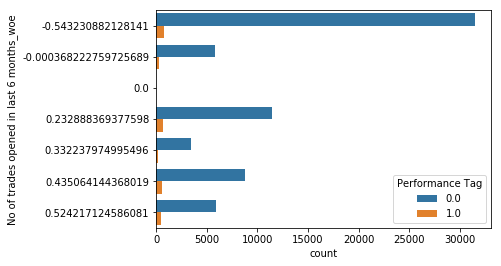

In [52]:
sns.countplot(y='No of trades opened in last 6 months_woe',data = woe_data, hue='Performance Tag')


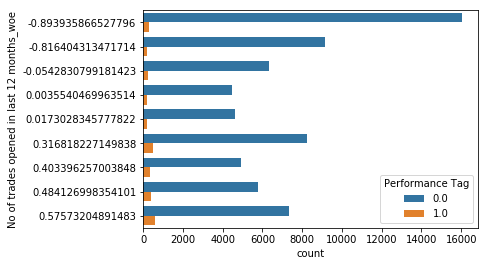

In [53]:
sns.countplot(y='No of trades opened in last 12 months_woe',data = woe_data, hue='Performance Tag')


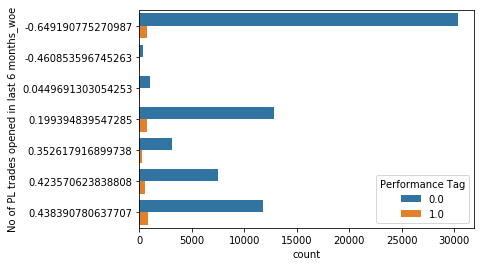

In [54]:
sns.countplot(y='No of PL trades opened in last 6 months_woe',data = woe_data, hue='Performance Tag')


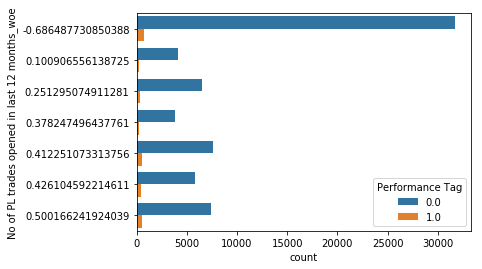

In [55]:
sns.countplot(y='No of PL trades opened in last 12 months_woe',data = woe_data, hue='Performance Tag')


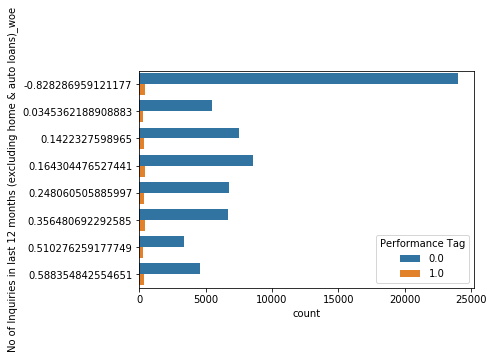

In [56]:
sns.countplot(y='No of Inquiries in last 12 months (excluding home & auto loans)_woe',data = woe_data, hue='Performance Tag')


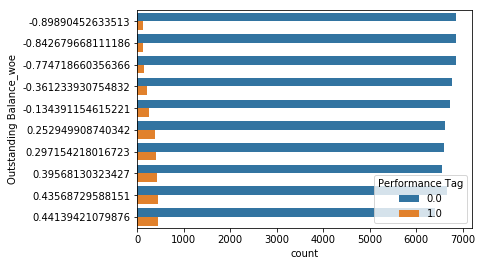

In [57]:
sns.countplot(y='Outstanding Balance_woe',data = woe_data, hue='Performance Tag')


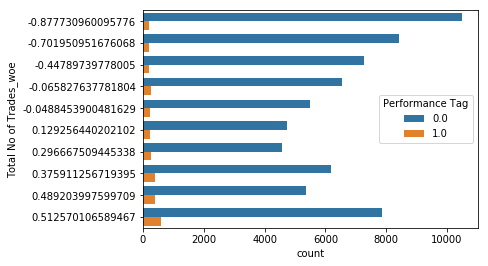

In [58]:
sns.countplot(y='Total No of Trades_woe',data = woe_data, hue='Performance Tag')


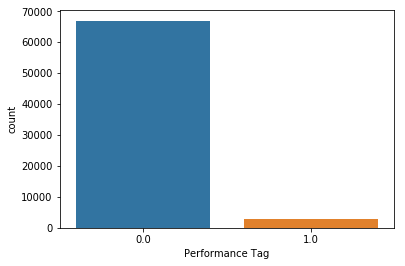

In [59]:
sns.countplot(x='Performance Tag',data = woe_data,)

#### The above graph clearly indicates that we have a class imbalance in our data which would need to be handled during data modeling using apropriate method

## Data Preperation

In [60]:
woe_data.head()

,Application ID,Performance Tag,Income_woe,No of months in current company_woe,No of months in current residence_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of times 90 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,...,Total No of Trades_woe,Gender_woe,Marital Status_woe,Education_woe,Profession_woe,Type of residence_woe,Presence of open home loan_woe,Presence of open auto loan_woe,No of dependents_woe,Age_woe
0,954457215,0.0,-0.272909,-0.228795,-0.069182,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.447897,0.032100,-0.004102,0.017390,-0.028375,-0.004479,-0.236703,0.011973,-0.085243,0.032840
1,432830445,0.0,-0.385540,-0.149320,-0.069182,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.048845,-0.010124,-0.004102,0.492577,-0.013343,-0.004479,0.071794,0.011973,-0.025207,-0.016278
2,941387308,0.0,-0.169391,-0.254889,-0.069182,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.877731,-0.010124,0.023383,0.017390,-0.013343,-0.004479,-0.236703,0.011973,-0.085243,0.031623
3,392161677,0.0,-0.385540,-0.254889,0.121460,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.447897,-0.010124,-0.004102,0.017390,0.091379,-0.004479,-0.236703,-0.138237,0.039996,-0.044690
4,182011211,0.0,-0.169391,-0.149320,-0.069182,-0.320076,-0.260685,-0.356637,-0.351921,-0.376395,...,-0.447897,0.032100,-0.004102,0.492577,-0.028375,-0.004479,-0.236703,0.011973,0.004301,0.031623


In [61]:
# Define Features and Target Variable
X=woe_data.drop(columns=['Application ID', 'Performance Tag'])
y=woe_data['Performance Tag']

## Checking and Handling Class Imbalance

In [62]:
# Check for class imbalance
print(y.value_counts())

print('Ratio = ',round(y.value_counts()[0]/y.value_counts()[1],2))

0.0    66917
1.0     2947
Name: Performance Tag, dtype: int64
Ratio =  22.71


In [63]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 2947})
X_train_res, y_train_res = cc.fit_sample(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [64]:
X_train_res = pd.DataFrame(X_train_res, columns = X.columns)
y_train_res = pd.DataFrame(y_train_res)

## First Model Building using WOE Table with only demographic features

In [65]:
# Selecting only Demographic Columns
X_train_res_demo = X_train_res[[ 'No of months in current company_woe','No of months in current residence_woe','Gender_woe','Income_woe','Marital Status_woe', 'Education_woe', 'Profession_woe','Type of residence_woe', 'No of dependents_woe', 'Age_woe']]
X_train_res_demo.head()

,No of months in current company_woe,No of months in current residence_woe,Gender_woe,Income_woe,Marital Status_woe,Education_woe,Profession_woe,Type of residence_woe,No of dependents_woe,Age_woe
0,0.016313,0.209816,0.016266,0.218233,0.006205,0.433178,-0.002131,-0.003406,-0.001038,0.036621
1,-0.214209,-0.252890,0.000154,-0.158424,-0.000667,0.492577,-0.005708,0.002096,-0.003978,-0.002567
2,0.004730,0.061004,-0.003314,0.167499,-0.001442,0.011332,-0.006635,0.003380,0.023088,0.008465
3,0.073321,0.214641,-0.002305,-0.304923,-0.003084,0.492577,0.002691,-0.003207,0.008462,-0.026796
4,-0.082572,-0.241408,-0.004846,0.047629,-0.000667,0.002719,-0.004981,0.007248,0.012008,0.009948


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res_demo, y_train_res, train_size=0.7, test_size=0.3, random_state=100)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


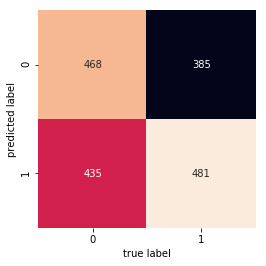

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');# Metrics beyond simply accuracy

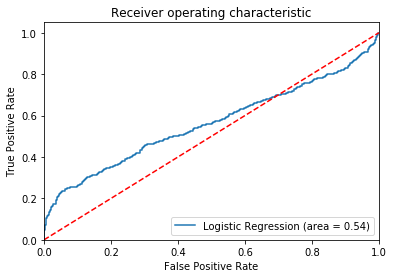

In [69]:
# Ploting ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Second Model Building using WOE Table with all features
### Logistic Regression

In [70]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm

#### Split Test and Train Data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res,y_train_res,train_size=0.7,test_size=0.3, random_state=100)

In [72]:
# First Model
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4099
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.1
Date:                Sun, 15 Sep 2019   Deviance:                       5476.1
Time:                        17:48:57   Pearson chi2:                 4.12e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.1231      0.059     -2.087      0.037      -0.239      -0.008
Income_woe                                                              0.2105      0.187      1.128      0.259      -0.155       0.576
No of months in current company_woe                                     0.7053      0.270      2.608      0.009       0.175       1.235
No of months in current residence_woe                                  -0.3973      0.146     -2.714      0.007      -0.684      -0.110
No of Inquiries in last 6 months (excluding home & auto loans)_woe      0.0397      0.125      0.318      0.751      -0.205       0.285
No of times 90 DPD or worse in last 6 months_woe                        0.4539      0.158      2.879      0.004       0.145       0.763
No of times 90 DPD or worse in last 12 months_woe                      -0.2234      0.141     -1.587      0.113      -0.499       0.053
No of times 60 DPD or worse in last 12 months_woe                      -0.1397      0.172     -0.812      0.417      -0.477       0.198
No of times 30 DPD or worse in last 12 months_woe                       0.3191      0.152      2.102      0.036       0.022       0.617
Avgas CC Utilization in last 12 months_woe                              0.2885      0.086      3.369      0.001       0.121       0.456
No of trades opened in last 6 months_woe                                0.5421      0.133      4.087      0.000       0.282       0.802
No of trades opened in last 12 months_woe                              -0.8176      0.177     -4.611      0.000      -1.165      -0.470
No of PL trades opened in last 6 months_woe                             0.0951      0.130      0.732      0.464      -0.160       0.350
No of PL trades opened in last 12 months_woe                            0.3766      0.139      2.711      0.007       0.104       0.649
No of Inquiries in last 12 months (excluding home & auto loans)_woe    -0.0208      0.102     -0.205      0.838      -0.220       0.179
Outstanding Balance_woe                                                 0.1616      0.123      1.312      0.189      -0.080       0.403
Total No of Trades_woe                                                  0.2726      0.167      1.636      0.102      -0.054       0.599
Gender_woe                                                              2.2448      2.403      0.934      0.350      -2.465       6.954
Marital Status_woe                                                     -2.7947      4.460     -0.627      0.531     -11.535       5.946
Education_woe                                                           0.3547      0.147      2.416      0.016       0.067       0.642
Profession_woe                    

In [73]:
# dropping column with high p value
X_train = X_train.drop('No of times 60 DPD or worse in last 12 months_woe',axis=1)

In [74]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4100
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.4
Date:                Sun, 15 Sep 2019   Deviance:                       5476.8
Time:                        17:48:57   Pearson chi2:                 4.12e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.1233      0.059     -2.092      0.036      -0.239      -0.008
Income_woe                                                              0.2069      0.187      1.109      0.267      -0.159       0.573
No of months in current company_woe                                     0.7025      0.270      2.598      0.009       0.172       1.232
No of months in current residence_woe                                  -0.4030      0.146     -2.756      0.006      -0.690      -0.116
No of Inquiries in last 6 months (excluding home & auto loans)_woe      0.0380      0.125      0.305      0.761      -0.207       0.283
No of times 90 DPD or worse in last 6 months_woe                        0.4151      0.150      2.763      0.006       0.121       0.710
No of times 90 DPD or worse in last 12 months_woe                      -0.2324      0.140     -1.656      0.098      -0.507       0.043
No of times 30 DPD or worse in last 12 months_woe                       0.2416      0.118      2.048      0.041       0.010       0.473
Avgas CC Utilization in last 12 months_woe                              0.2847      0.086      3.330      0.001       0.117       0.452
No of trades opened in last 6 months_woe                                0.5423      0.133      4.088      0.000       0.282       0.802
No of trades opened in last 12 months_woe                              -0.8175      0.177     -4.611      0.000      -1.165      -0.470
No of PL trades opened in last 6 months_woe                             0.0965      0.130      0.743      0.458      -0.158       0.351
No of PL trades opened in last 12 months_woe                            0.3752      0.139      2.701      0.007       0.103       0.648
No of Inquiries in last 12 months (excluding home & auto loans)_woe    -0.0186      0.102     -0.183      0.855      -0.218       0.181
Outstanding Balance_woe                                                 0.1631      0.123      1.325      0.185      -0.078       0.404
Total No of Trades_woe                                                  0.2711      0.167      1.627      0.104      -0.055       0.598
Gender_woe                                                              2.2140      2.403      0.922      0.357      -2.495       6.923
Marital Status_woe                                                     -2.7198      4.457     -0.610      0.542     -11.456       6.017
Education_woe                                                           0.3551      0.147      2.419      0.016       0.067       0.643
Profession_woe                                                          1.0933      0.911      1.200      0.230      -0.692       2.878
Type of residence_woe             

In [75]:
# dropping column with high p value
X_train = X_train.drop('No of Inquiries in last 6 months (excluding home & auto loans)_woe',axis=1)

In [76]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4101
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.4
Date:                Sun, 15 Sep 2019   Deviance:                       5476.9
Time:                        17:48:57   Pearson chi2:                 4.12e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.1232      0.059     -2.090      0.037      -0.239      -0.008
Income_woe                                                              0.2063      0.187      1.106      0.269      -0.159       0.572
No of months in current company_woe                                     0.7023      0.270      2.597      0.009       0.172       1.232
No of months in current residence_woe                                  -0.4027      0.146     -2.754      0.006      -0.689      -0.116
No of times 90 DPD or worse in last 6 months_woe                        0.4136      0.150      2.755      0.006       0.119       0.708
No of times 90 DPD or worse in last 12 months_woe                      -0.2319      0.140     -1.652      0.099      -0.507       0.043
No of times 30 DPD or worse in last 12 months_woe                       0.2454      0.117      2.092      0.036       0.016       0.475
Avgas CC Utilization in last 12 months_woe                              0.2835      0.085      3.319      0.001       0.116       0.451
No of trades opened in last 6 months_woe                                0.5438      0.133      4.102      0.000       0.284       0.804
No of trades opened in last 12 months_woe                              -0.8197      0.177     -4.628      0.000      -1.167      -0.473
No of PL trades opened in last 6 months_woe                             0.0964      0.130      0.742      0.458      -0.158       0.351
No of PL trades opened in last 12 months_woe                            0.3785      0.139      2.733      0.006       0.107       0.650
No of Inquiries in last 12 months (excluding home & auto loans)_woe    -0.0026      0.087     -0.030      0.976      -0.173       0.168
Outstanding Balance_woe                                                 0.1615      0.123      1.313      0.189      -0.080       0.402
Total No of Trades_woe                                                  0.2716      0.167      1.630      0.103      -0.055       0.598
Gender_woe                                                              2.2169      2.402      0.923      0.356      -2.492       6.926
Marital Status_woe                                                     -2.7299      4.457     -0.612      0.540     -11.466       6.006
Education_woe                                                           0.3547      0.147      2.417      0.016       0.067       0.642
Profession_woe                                                          1.0859      0.910      1.193      0.233      -0.698       2.870
Type of residence_woe                                                   3.1804      1.693      1.878      0.060      -0.138       6.499
Presence of open home loan_woe    

In [77]:
# dropping column with high p value
X_train = X_train.drop('Gender_woe',axis=1)

In [78]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4102
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.9
Date:                Sun, 15 Sep 2019   Deviance:                       5477.7
Time:                        17:48:57   Pearson chi2:                 4.12e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.1240      0.059     -2.103      0.035      -0.239      -0.008
Income_woe                                                              0.2098      0.186      1.125      0.261      -0.156       0.575
No of months in current company_woe                                     0.7089      0.270      2.623      0.009       0.179       1.239
No of months in current residence_woe                                  -0.4041      0.146     -2.764      0.006      -0.691      -0.118
No of times 90 DPD or worse in last 6 months_woe                        0.4137      0.150      2.755      0.006       0.119       0.708
No of times 90 DPD or worse in last 12 months_woe                      -0.2307      0.140     -1.644      0.100      -0.506       0.044
No of times 30 DPD or worse in last 12 months_woe                       0.2458      0.117      2.096      0.036       0.016       0.476
Avgas CC Utilization in last 12 months_woe                              0.2818      0.085      3.301      0.001       0.114       0.449
No of trades opened in last 6 months_woe                                0.5428      0.133      4.095      0.000       0.283       0.803
No of trades opened in last 12 months_woe                              -0.8178      0.177     -4.617      0.000      -1.165      -0.471
No of PL trades opened in last 6 months_woe                             0.0967      0.130      0.744      0.457      -0.158       0.351
No of PL trades opened in last 12 months_woe                            0.3824      0.138      2.762      0.006       0.111       0.654
No of Inquiries in last 12 months (excluding home & auto loans)_woe    -0.0021      0.087     -0.024      0.981      -0.172       0.168
Outstanding Balance_woe                                                 0.1587      0.123      1.291      0.197      -0.082       0.400
Total No of Trades_woe                                                  0.2691      0.167      1.615      0.106      -0.057       0.596
Marital Status_woe                                                     -2.7179      4.456     -0.610      0.542     -11.452       6.016
Education_woe                                                           0.3571      0.147      2.434      0.015       0.069       0.645
Profession_woe                                                          1.0940      0.910      1.202      0.229      -0.690       2.878
Type of residence_woe                                                   3.1825      1.689      1.885      0.059      -0.127       6.492
Presence of open home loan_woe                                          0.8319      0.285      2.915      0.004       0.273       1.391
Presence of open auto loan_woe    

In [79]:
# dropping column with high p value
X_train = X_train.drop('Marital Status_woe',axis=1)

In [80]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4103
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.0
Date:                Sun, 15 Sep 2019   Deviance:                       5478.1
Time:                        17:48:57   Pearson chi2:                 4.12e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.1245      0.059     -2.112      0.035      -0.240      -0.009
Income_woe                                                              0.2081      0.186      1.116      0.264      -0.157       0.574
No of months in current company_woe                                     0.7096      0.270      2.626      0.009       0.180       1.239
No of months in current residence_woe                                  -0.4053      0.146     -2.773      0.006      -0.692      -0.119
No of times 90 DPD or worse in last 6 months_woe                        0.4159      0.150      2.771      0.006       0.122       0.710
No of times 90 DPD or worse in last 12 months_woe                      -0.2313      0.140     -1.649      0.099      -0.506       0.044
No of times 30 DPD or worse in last 12 months_woe                       0.2441      0.117      2.082      0.037       0.014       0.474
Avgas CC Utilization in last 12 months_woe                              0.2836      0.085      3.324      0.001       0.116       0.451
No of trades opened in last 6 months_woe                                0.5445      0.133      4.109      0.000       0.285       0.804
No of trades opened in last 12 months_woe                              -0.8172      0.177     -4.614      0.000      -1.164      -0.470
No of PL trades opened in last 6 months_woe                             0.0948      0.130      0.729      0.466      -0.160       0.349
No of PL trades opened in last 12 months_woe                            0.3829      0.138      2.766      0.006       0.112       0.654
No of Inquiries in last 12 months (excluding home & auto loans)_woe    -0.0019      0.087     -0.022      0.982      -0.172       0.168
Outstanding Balance_woe                                                 0.1576      0.123      1.282      0.200      -0.083       0.398
Total No of Trades_woe                                                  0.2684      0.167      1.612      0.107      -0.058       0.595
Education_woe                                                           0.3586      0.147      2.444      0.015       0.071       0.646
Profession_woe                                                          1.0933      0.910      1.201      0.230      -0.690       2.877
Type of residence_woe                                                   3.1427      1.681      1.870      0.062      -0.151       6.437
Presence of open home loan_woe                                          0.8316      0.285      2.914      0.004       0.272       1.391
Presence of open auto loan_woe                                          1.6719      1.021      1.637      0.102      -0.330       3.673
No of dependents_woe              

In [81]:
# dropping column with high p value
X_train = X_train.drop('No of Inquiries in last 12 months (excluding home & auto loans)_woe',axis=1)

In [82]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4104
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.0
Date:                Sun, 15 Sep 2019   Deviance:                       5478.1
Time:                        17:48:58   Pearson chi2:                 4.12e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.1245      0.059     -2.113      0.035      -0.240      -0.009
Income_woe                                            0.2079      0.186      1.116      0.264      -0.157       0.573
No of months in current company_woe                   0.7094      0.270      2.627      0.009       0.180       1.239
No of months in current residence_woe                -0.4051      0.146     -2.776      0.006      -0.691      -0.119
No of times 90 DPD or worse in last 6 months_woe      0.4159      0.150      2.771      0.006       0.122       0.710
No of times 90 DPD or worse in last 12 months_woe    -0.2314      0.140     -1.649      0.099      -0.506       0.044
No of times 30 DPD or worse in last 12 months_woe     0.2439      0.117      2.086      0.037       0.015       0.473
Avgas CC Utilization in last 12 months_woe            0.2834      0.085      3.345      0.001       0.117       0.449
No of trades opened in last 6 months_woe              0.5444      0.132      4.109      0.000       0.285       0.804
No of trades opened in last 12 months_woe            -0.8177      0.176     -4.656      0.000      -1.162      -0.473
No of PL trades opened in last 6 months_woe           0.0948      0.130      0.730      0.466      -0.160       0.349
No of PL trades opened in last 12 months_woe          0.3829      0.138      2.766      0.006       0.112       0.654
Outstanding Balance_woe                               0.1575      0.123      1.282      0.200      -0.083       0.398
Total No of Trades_woe                                0.2682      0.166      1.613      0.107      -0.058       0.594
Education_woe                                         0.3585      0.147      2.444      0.015       0.071       0.646
Profession_woe                                        1.0934      0.910      1.201      0.230      -0.690       2.877
Type of residence_woe                                 3.1429      1.681      1.870      0.061      -0.151       6.437
Presence of open home loan_woe                        0.8314      0.285      2.915      0.004       0.272       1.390
Presence of open auto loan_woe                        1.6716      1.021      1.637      0.102      -0.330       3.673
No of dependents_woe                                  1.9402      0.853      2.275      0.023       0.269       3.611
Age_woe                                               1.6831      0.685      2.458      0.014       0.341       3.025
=====================================================================================================================
"""

In [83]:
# dropping column with high p value
X_train = X_train.drop('Total No of Trades_woe',axis=1)

In [84]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4105
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Sun, 15 Sep 2019   Deviance:                       5480.7
Time:                        17:48:58   Pearson chi2:                 4.13e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.1256      0.059     -2.132      0.033      -0.241      -0.010
Income_woe                                            0.2071      0.186      1.112      0.266      -0.158       0.572
No of months in current company_woe                   0.7040      0.270      2.609      0.009       0.175       1.233
No of months in current residence_woe                -0.4143      0.146     -2.842      0.004      -0.700      -0.129
No of times 90 DPD or worse in last 6 months_woe      0.4086      0.150      2.726      0.006       0.115       0.702
No of times 90 DPD or worse in last 12 months_woe    -0.2273      0.140     -1.621      0.105      -0.502       0.047
No of times 30 DPD or worse in last 12 months_woe     0.2572      0.117      2.206      0.027       0.029       0.486
Avgas CC Utilization in last 12 months_woe            0.2745      0.085      3.249      0.001       0.109       0.440
No of trades opened in last 6 months_woe              0.6008      0.128      4.698      0.000       0.350       0.851
No of trades opened in last 12 months_woe            -0.6584      0.145     -4.543      0.000      -0.942      -0.374
No of PL trades opened in last 6 months_woe           0.0977      0.130      0.753      0.452      -0.157       0.352
No of PL trades opened in last 12 months_woe          0.4026      0.138      2.921      0.003       0.132       0.673
Outstanding Balance_woe                               0.1580      0.123      1.287      0.198      -0.083       0.399
Education_woe                                         0.3605      0.147      2.459      0.014       0.073       0.648
Profession_woe                                        1.0704      0.910      1.177      0.239      -0.712       2.853
Type of residence_woe                                 3.1205      1.682      1.855      0.064      -0.177       6.418
Presence of open home loan_woe                        0.8313      0.285      2.916      0.004       0.273       1.390
Presence of open auto loan_woe                        1.6466      1.021      1.613      0.107      -0.354       3.647
No of dependents_woe                                  1.9567      0.852      2.296      0.022       0.286       3.627
Age_woe                                               1.6964      0.684      2.479      0.013       0.355       3.038
=====================================================================================================================
"""

In [85]:
# dropping column with high p value
X_train = X_train.drop('Outstanding Balance_woe',axis=1)

In [86]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4106
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.2
Date:                Sun, 15 Sep 2019   Deviance:                       5482.4
Time:                        17:48:58   Pearson chi2:                 4.13e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.1266      0.059     -2.150      0.032      -0.242      -0.011
Income_woe                                            0.2053      0.186      1.103      0.270      -0.160       0.570
No of months in current company_woe                   0.7084      0.270      2.626      0.009       0.180       1.237
No of months in current residence_woe                -0.4083      0.146     -2.804      0.005      -0.694      -0.123
No of times 90 DPD or worse in last 6 months_woe      0.4109      0.150      2.742      0.006       0.117       0.705
No of times 90 DPD or worse in last 12 months_woe    -0.2247      0.140     -1.604      0.109      -0.499       0.050
No of times 30 DPD or worse in last 12 months_woe     0.2499      0.116      2.147      0.032       0.022       0.478
Avgas CC Utilization in last 12 months_woe            0.2838      0.084      3.372      0.001       0.119       0.449
No of trades opened in last 6 months_woe              0.5885      0.127      4.617      0.000       0.339       0.838
No of trades opened in last 12 months_woe            -0.6293      0.143     -4.397      0.000      -0.910      -0.349
No of PL trades opened in last 6 months_woe           0.1100      0.129      0.850      0.396      -0.144       0.364
No of PL trades opened in last 12 months_woe          0.4873      0.121      4.022      0.000       0.250       0.725
Education_woe                                         0.3638      0.147      2.482      0.013       0.077       0.651
Profession_woe                                        1.0754      0.909      1.183      0.237      -0.707       2.858
Type of residence_woe                                 3.0883      1.681      1.837      0.066      -0.206       6.383
Presence of open home loan_woe                        0.9182      0.277      3.316      0.001       0.375       1.461
Presence of open auto loan_woe                        1.3820      1.002      1.379      0.168      -0.583       3.347
No of dependents_woe                                  1.9250      0.852      2.260      0.024       0.256       3.594
Age_woe                                               1.7079      0.684      2.497      0.013       0.367       3.049
=====================================================================================================================
"""

In [87]:
# dropping column with high p value
X_train = X_train.drop('Profession_woe',axis=1)

In [88]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4107
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.9
Date:                Sun, 15 Sep 2019   Deviance:                       5483.8
Time:                        17:48:58   Pearson chi2:                 4.13e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.1247      0.059     -2.119      0.034      -0.240      -0.009
Income_woe                                            0.2122      0.186      1.141      0.254      -0.152       0.577
No of months in current company_woe                   0.7128      0.270      2.643      0.008       0.184       1.241
No of months in current residence_woe                -0.4093      0.146     -2.811      0.005      -0.695      -0.124
No of times 90 DPD or worse in last 6 months_woe      0.4081      0.150      2.724      0.006       0.114       0.702
No of times 90 DPD or worse in last 12 months_woe    -0.2195      0.140     -1.568      0.117      -0.494       0.055
No of times 30 DPD or worse in last 12 months_woe     0.2503      0.116      2.151      0.031       0.022       0.478
Avgas CC Utilization in last 12 months_woe            0.2835      0.084      3.369      0.001       0.119       0.448
No of trades opened in last 6 months_woe              0.5900      0.127      4.630      0.000       0.340       0.840
No of trades opened in last 12 months_woe            -0.6321      0.143     -4.418      0.000      -0.913      -0.352
No of PL trades opened in last 6 months_woe           0.1075      0.129      0.831      0.406      -0.146       0.361
No of PL trades opened in last 12 months_woe          0.4894      0.121      4.040      0.000       0.252       0.727
Education_woe                                         0.3592      0.147      2.452      0.014       0.072       0.646
Type of residence_woe                                 2.9619      1.666      1.778      0.075      -0.303       6.227
Presence of open home loan_woe                        0.9221      0.277      3.330      0.001       0.379       1.465
Presence of open auto loan_woe                        1.3967      1.002      1.394      0.163      -0.567       3.361
No of dependents_woe                                  1.9042      0.851      2.237      0.025       0.236       3.573
Age_woe                                               1.6987      0.684      2.484      0.013       0.359       3.039
=====================================================================================================================
"""

In [89]:
# dropping column with high p value
X_train = X_train.drop('Presence of open auto loan_woe',axis=1)

In [90]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4108
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.9
Date:                Sun, 15 Sep 2019   Deviance:                       5485.7
Time:                        17:48:58   Pearson chi2:                 4.13e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.1262      0.059     -2.145      0.032      -0.241      -0.011
Income_woe                                            0.2225      0.186      1.198      0.231      -0.142       0.587
No of months in current company_woe                   0.7204      0.270      2.672      0.008       0.192       1.249
No of months in current residence_woe                -0.4064      0.146     -2.792      0.005      -0.692      -0.121
No of times 90 DPD or worse in last 6 months_woe      0.4057      0.150      2.709      0.007       0.112       0.699
No of times 90 DPD or worse in last 12 months_woe    -0.2142      0.140     -1.531      0.126      -0.488       0.060
No of times 30 DPD or worse in last 12 months_woe     0.2430      0.116      2.091      0.036       0.015       0.471
Avgas CC Utilization in last 12 months_woe            0.2861      0.084      3.401      0.001       0.121       0.451
No of trades opened in last 6 months_woe              0.5897      0.127      4.627      0.000       0.340       0.839
No of trades opened in last 12 months_woe            -0.6226      0.143     -4.358      0.000      -0.903      -0.343
No of PL trades opened in last 6 months_woe           0.1050      0.129      0.812      0.417      -0.149       0.358
No of PL trades opened in last 12 months_woe          0.4895      0.121      4.041      0.000       0.252       0.727
Education_woe                                         0.3605      0.146      2.461      0.014       0.073       0.648
Type of residence_woe                                 2.9881      1.657      1.803      0.071      -0.260       6.236
Presence of open home loan_woe                        0.9148      0.277      3.305      0.001       0.372       1.457
No of dependents_woe                                  1.9434      0.851      2.284      0.022       0.276       3.611
Age_woe                                               1.7125      0.684      2.505      0.012       0.373       3.052
=====================================================================================================================
"""

In [91]:
# dropping column with high p value
X_train = X_train.drop('No of PL trades opened in last 6 months_woe',axis=1)

In [92]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4109
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.2
Date:                Sun, 15 Sep 2019   Deviance:                       5486.4
Time:                        17:48:58   Pearson chi2:                 4.13e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.1265      0.059     -2.152      0.031      -0.242      -0.011
Income_woe                                            0.2219      0.186      1.195      0.232      -0.142       0.586
No of months in current company_woe                   0.7210      0.270      2.675      0.007       0.193       1.249
No of months in current residence_woe                -0.4035      0.146     -2.773      0.006      -0.689      -0.118
No of times 90 DPD or worse in last 6 months_woe      0.4081      0.150      2.725      0.006       0.115       0.701
No of times 90 DPD or worse in last 12 months_woe    -0.2167      0.140     -1.549      0.121      -0.491       0.058
No of times 30 DPD or worse in last 12 months_woe     0.2361      0.116      2.038      0.042       0.009       0.463
Avgas CC Utilization in last 12 months_woe            0.2900      0.084      3.452      0.001       0.125       0.455
No of trades opened in last 6 months_woe              0.6318      0.116      5.426      0.000       0.404       0.860
No of trades opened in last 12 months_woe            -0.6053      0.141     -4.286      0.000      -0.882      -0.329
No of PL trades opened in last 12 months_woe          0.5277      0.112      4.724      0.000       0.309       0.747
Education_woe                                         0.3615      0.146      2.469      0.014       0.075       0.649
Type of residence_woe                                 2.9648      1.656      1.790      0.073      -0.281       6.210
Presence of open home loan_woe                        0.9109      0.277      3.291      0.001       0.368       1.453
No of dependents_woe                                  1.9313      0.850      2.271      0.023       0.264       3.598
Age_woe                                               1.7057      0.684      2.495      0.013       0.366       3.045
=====================================================================================================================
"""

In [93]:
# dropping column with high p value
X_train = X_train.drop('Income_woe',axis=1)

In [94]:
logm = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                 4125
Model:                            GLM   Df Residuals:                     4110
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.9
Date:                Sun, 15 Sep 2019   Deviance:                       5487.8
Time:                        17:48:58   Pearson chi2:                 4.12e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.1270      0.059     -2.161      0.031      -0.242      -0.012
No of months in current company_woe                   0.6922      0.268      2.579      0.010       0.166       1.218
No of months in current residence_woe                -0.4001      0.145     -2.750      0.006      -0.685      -0.115
No of times 90 DPD or worse in last 6 months_woe      0.4065      0.150      2.715      0.007       0.113       0.700
No of times 90 DPD or worse in last 12 months_woe    -0.2115      0.140     -1.512      0.130      -0.486       0.063
No of times 30 DPD or worse in last 12 months_woe     0.2445      0.116      2.114      0.034       0.018       0.471
Avgas CC Utilization in last 12 months_woe            0.2960      0.084      3.530      0.000       0.132       0.460
No of trades opened in last 6 months_woe              0.6334      0.116      5.440      0.000       0.405       0.862
No of trades opened in last 12 months_woe            -0.6001      0.141     -4.252      0.000      -0.877      -0.324
No of PL trades opened in last 12 months_woe          0.5312      0.112      4.756      0.000       0.312       0.750
Education_woe                                         0.3646      0.146      2.491      0.013       0.078       0.652
Type of residence_woe                                 2.9940      1.655      1.809      0.070      -0.249       6.237
Presence of open home loan_woe                        0.9172      0.277      3.315      0.001       0.375       1.459
No of dependents_woe                                  1.9362      0.850      2.277      0.023       0.270       3.603
Age_woe                                               1.7697      0.681      2.597      0.009       0.434       3.105
=====================================================================================================================
"""

#### Check VIF Value for selected features

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,No of trades opened in last 12 months_woe,4.57
3,No of times 90 DPD or worse in last 12 months_woe,4.51
2,No of times 90 DPD or worse in last 6 months_woe,3.93
4,No of times 30 DPD or worse in last 12 months_woe,3.01
8,No of PL trades opened in last 12 months_woe,2.94
6,No of trades opened in last 6 months_woe,2.37
5,Avgas CC Utilization in last 12 months_woe,1.94
1,No of months in current residence_woe,1.35
0,No of months in current company_woe,1.04
9,Education_woe,1.03


As the vif values for all columns are below 5 there is no multicolinearity among the variables

In [96]:
# Get predicted value on train set
y_train_pred = res.predict(sm.add_constant(X_train))

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.62147392, 0.67931857, 0.26293603, ..., 0.49809152, 0.51746401,
       0.53510666])

In [98]:
y_train_pred_df = pd.DataFrame({'Converted':y_train.values.reshape(-1),'Convert_prob':y_train_pred})
y_train_pred_df['Convert_pred'] = y_train_pred_df['Convert_prob'].apply(lambda x: 1 if x>=0.5 else 0)
y_train_pred_df.head()

,Converted,Convert_prob,Convert_pred
0,0.0,0.621474,1
1,0.0,0.679319,1
2,0.0,0.262936,0
3,0.0,0.485021,0
4,1.0,0.652770,1


In [99]:
# Accurecy
metrics.accuracy_score(y_train_pred_df.Converted,y_train_pred_df.Convert_pred)*100

58.93333333333334

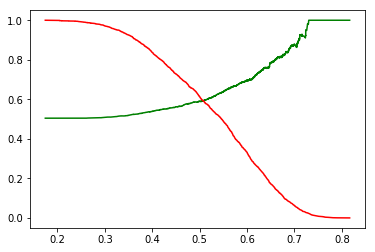

In [100]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Convert_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [101]:
# Making Prediction on the test set
y_test_pred = res.predict(sm.add_constant(X_test[X_train.columns]))

In [102]:
y_test_pred_df = pd.DataFrame({'Converted':y_test.values.reshape(-1),'Convert_prob':y_test_pred})
y_test_pred_df['Convert_pred'] = y_test_pred_df['Convert_prob'].apply(lambda x: 1 if x>=0.50 else 0)
y_test_pred_df.head()

,Converted,Convert_prob,Convert_pred
3187,1.0,0.395509,0
770,0.0,0.448393,0
5346,1.0,0.561452,1
2671,0.0,0.416850,0
3388,1.0,0.320790,0


In [103]:
# Model Accuracy
metrics.accuracy_score(y_test_pred_df.Converted, y_test_pred_df.Convert_pred)

0.5782928208027134

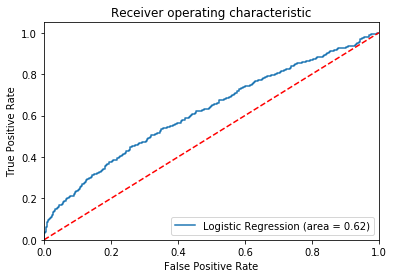

In [104]:
# Ploting ROC Curve

logit_roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### We are able to get a 63.15% accuracy with Logistic Regression Model


### SVM Model with Polynomial Kernel

In [105]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
hyper_params = {'C': [1,5,10,50,100,250,500]}


# Using Polynomial kernel with SVM Model
model_poly = SVC(kernel='poly')

# set up GridSearchCV()
model_cv_poly = GridSearchCV(estimator = model_poly, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)      



# fit the model
model_cv_poly.fit(X_train,y_train)  

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.3s finished
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50, 100, 250, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [106]:
# cv results
cv_results = pd.DataFrame(model_cv_poly.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.497497,0.014980,0.075004,0.005514,1,{'C': 1},0.545455,0.609697,0.597576,0.575758,...,0.579879,0.022292,7,0.585455,0.584545,0.580606,0.585455,0.590909,0.585394,0.003288
1,0.447900,0.037741,0.066344,0.004520,5,{'C': 5},0.553939,0.619394,0.595152,0.574545,...,0.583273,0.022277,6,0.586061,0.582424,0.577273,0.586061,0.595152,0.585394,0.005846
2,0.410131,0.003332,0.059476,0.000533,10,{'C': 10},0.558788,0.623030,0.604848,0.575758,...,0.589576,0.022398,5,0.590000,0.592424,0.586364,0.596364,0.602424,0.593515,0.005517
3,0.392975,0.005745,0.058605,0.001100,50,{'C': 50},0.580606,0.626667,0.625455,0.602424,...,0.600727,0.023374,3,0.612121,0.606364,0.607576,0.613636,0.618485,0.611636,0.004369
4,0.387667,0.007528,0.058378,0.003831,100,{'C': 100},0.583030,0.623030,0.623030,0.592727,...,0.599030,0.020533,4,0.614545,0.614848,0.610000,0.625758,0.623333,0.617697,0.005900
5,0.416248,0.010178,0.061231,0.003304,250,{'C': 250},0.587879,0.625455,0.633939,0.591515,...,0.603152,0.022358,2,0.629091,0.625758,0.620303,0.632727,0.628788,0.627333,0.004152
6,0.344710,0.071326,0.044826,0.008514,500,{'C': 500},0.612121,0.636364,0.648485,0.597576,...,0.616970,0.022271,1,0.639394,0.635455,0.640303,0.648788,0.651818,0.643152,0.006138


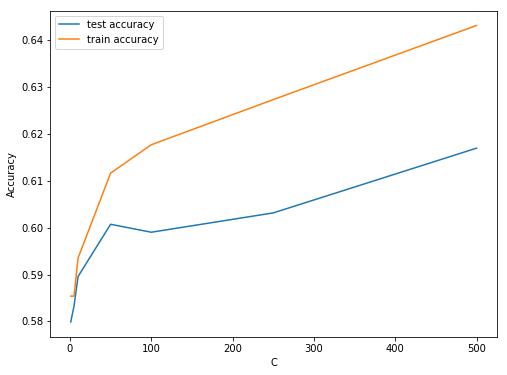

In [107]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

In [108]:
# final model with C=0.75 and polynimial kernel
model = SVC(C=100, kernel='poly')

# Fit model on larger test set
model.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
# Lets predict the results based on our test set
y_pred = model.predict(X_test[X_train.columns])

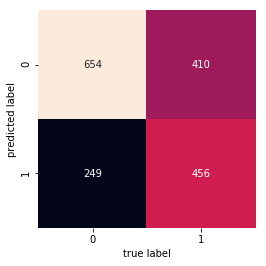

In [110]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');# Metrics beyond simply accuracy

In [111]:
# print metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average=None))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average=None))

accuracy 0.6274731486715659
precision [0.61466165 0.64680851]
recall [0.72425249 0.52655889]


### SVM Model with RBF Kernel

In [112]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
hyper_params = {'C': [1000,5000,10000,15000,20000]}


# Using Polynomial kernel with SVM Model
model_rbf = SVC(kernel='rbf')

# set up GridSearchCV()
model_cv_rbf = GridSearchCV(estimator = model_rbf, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)      



# fit the model
model_cv_rbf.fit(X_train,y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.1s finished
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1000, 5000, 10000, 15000, 20000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [113]:
# cv results
cv_results = pd.DataFrame(model_cv_rbf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.735369,0.044581,0.063858,0.000346,1000,{'C': 1000},0.793939,0.825455,0.812121,0.803636,...,0.810909,0.011188,5,0.849091,0.850909,0.854848,0.852727,0.848182,0.851152,0.002420
1,4.714866,0.336320,0.051181,0.000383,5000,{'C': 5000},0.855758,0.875152,0.852121,0.864242,...,0.860848,0.008164,4,0.910303,0.906970,0.913333,0.909091,0.910000,0.909939,0.002059
2,8.205839,0.275437,0.046418,0.001566,10000,{'C': 10000},0.876364,0.893333,0.863030,0.875152,...,0.875879,0.009895,3,0.928788,0.926667,0.932121,0.931515,0.930606,0.929939,0.001986
3,11.263790,0.262769,0.042608,0.001632,15000,{'C': 15000},0.883636,0.901818,0.867879,0.882424,...,0.884364,0.010804,2,0.942424,0.933939,0.940909,0.940303,0.943636,0.940242,0.003360
4,11.002633,0.946147,0.025739,0.001208,20000,{'C': 20000},0.886061,0.909091,0.883636,0.892121,...,0.893091,0.008920,1,0.946970,0.944242,0.946970,0.944848,0.951515,0.946909,0.002553


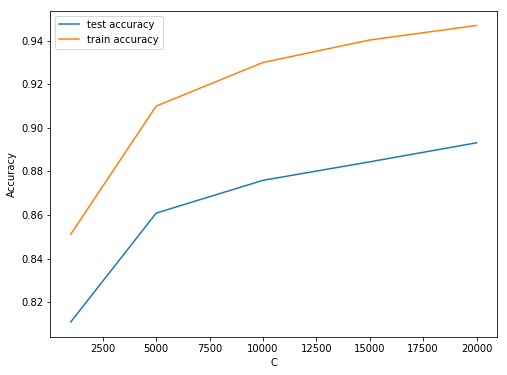

In [114]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

In [115]:
# final model with C= 3 and rbf kernel
model = SVC(C=20000, kernel='rbf')

# Fit model on larger test set
model.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=20000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [116]:
# Lets predict the results based on our test set
y_pred = model.predict(X_test[X_train.columns])

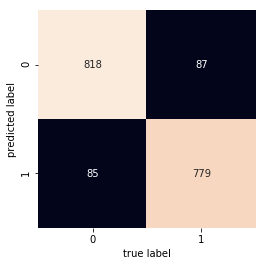

In [117]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');# Metrics beyond simply accuracy

In [118]:
# print metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average=None))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average=None))

accuracy 0.9027699265121537
precision [0.9038674  0.90162037]
recall [0.90586932 0.89953811]


### Random Forest Classifier

In [119]:
# Create the parameter grid 
param_grid = {
    'max_depth': [3,4,5],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'n_estimators': [100,200,300], 
    'max_features': [5,10,14]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  1.6min finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [120]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9721212121212122 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [121]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [122]:
rfc.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
# Predict Values
y_pred = rfc.predict(X_test[X_train.columns])

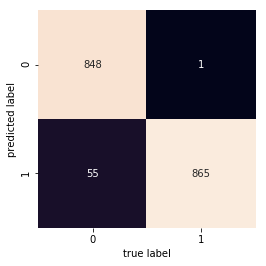

In [124]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');# Metrics beyond simply accuracy

In [125]:
# print metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average=None))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average=None))



accuracy 0.9683436970039571
precision [0.99882214 0.94021739]
recall [0.93909192 0.99884527]


In [126]:
# Important Features
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Type of residence_woe,0.640886
Age_woe,0.160987
No of dependents_woe,0.160533
Presence of open home loan_woe,0.019111
Avgas CC Utilization in last 12 months_woe,0.008798
No of PL trades opened in last 12 months_woe,0.001982
No of trades opened in last 12 months_woe,0.001901
Education_woe,0.001755
No of times 30 DPD or worse in last 12 months_woe,0.001661
No of months in current company_woe,0.000848


## Considering the results of various models, Random Forest gives us the best results with 97.73% accuracy for the test data.

### Building Application Scorecard
Build an application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

    - For the rejected population, calculate the application scores and assess the results. Compare the scores of the rejected population with the approved candidates and comment on the observations.

    - On the basis of the scorecard, identify the cut-off score below which you would not grant credit cards to applicants.

##### Running Random Forest to get the class probablility
As we have not been provided with a seperate data set for prediction we will use the same data for training and generating the probability score on test data.

In [127]:
# Predict Values
y_pred = rfc.predict_proba(X_train[X_train.columns])
df = pd.DataFrame(y_pred, columns=['Prob','Class'])
df.head()

,Prob,Class
0,0.995359,0.004641
1,0.971219,0.028781
2,0.993176,0.006824
3,0.978060,0.021940
4,0.031518,0.968482


In [128]:
prob_df = pd.DataFrame({'Performance_tag': y_train.values.reshape(-1), 'Pred_prob': df.Prob})
prob_df.head()

,Performance_tag,Pred_prob
0,0.0,0.995359
1,0.0,0.971219
2,0.0,0.993176
3,0.0,0.978060
4,1.0,0.031518


 Formulas and Calculations (as guided by the mentor):
 
 Factor = (Point at whcih log odds double)/ln(2)
        
        = 20/0.6931
        
        = 28.85
        
Offset = Score - (Factor * ln(odds))
        
       = 400 - (28.85 * ln(10))
       
       = 333.56
       
### Score = offset+factor * ln(Odds)

In [129]:
prob_df['Score'] = 333.56 + (28.85*np.log(prob_df.Pred_prob))
prob_df.head()

,Performance_tag,Pred_prob,Score
0,0.0,0.995359,333.425805
1,0.0,0.971219,332.717473
2,0.0,0.993176,333.362445
3,0.0,0.978060,332.919970
4,1.0,0.031518,233.819917


In [130]:
prob_df.Score.describe()

count    4125.000000
mean      285.641760
std        50.076289
min       131.806599
25%       242.486930
50%       293.730370
75%       333.367070
max       333.425805
Name: Score, dtype: float64

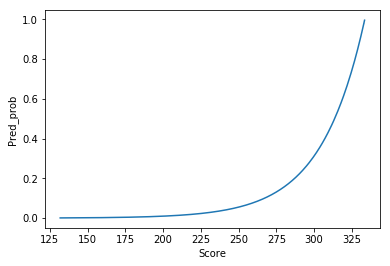

In [131]:
sns.lineplot(x='Score',y='Pred_prob',data=prob_df)

#### Cutoff Score is 282

In [132]:
prob_df['Result'] = prob_df.Score.apply(lambda x: 'Selected' if x>= 282 else 'Rejected')
prob_df.head()


,Performance_tag,Pred_prob,Score,Result
0,0.0,0.995359,333.425805,Selected
1,0.0,0.971219,332.717473,Selected
2,0.0,0.993176,333.362445,Selected
3,0.0,0.978060,332.919970,Selected
4,1.0,0.031518,233.819917,Rejected


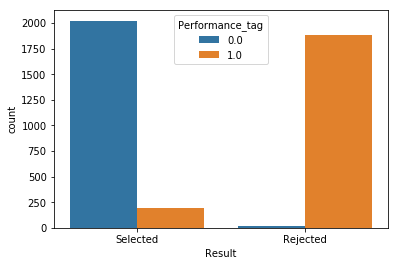

In [133]:
sns.countplot(hue='Performance_tag', x='Result', data = prob_df)

In [134]:
prob_df.groupby(['Result','Performance_tag']).count()

Pred_prob  Score
Result   Performance_tag                  
Rejected 0.0                     21     21
         1.0                   1887   1887
Selected 0.0                   2023   2023
         1.0                    194    194

## Assessing the financial benefit of your project:
### Auto Approval
Per our model prediction we selected 2266 customers out of 4125 customers. Thus using the model for auto approval we would be able to approve **98.97%** (2023 out of 2044) of application correctly, with a false positive rate of only 10.72% (243 out of 2266) 

### Potential Credit Loss Avoided
Assuming that each defaulting customer costs the organization 50,000 on average and each non-deafulting customer gave a profit of 20,000 in a year.

**Computation without using the model:**

Total Customers given Credit Card = 4125

Profit making Customers = 2044

Total Profit Earned = 4,08,80,000

Defaulting Customers = 2081

Total Loss to organization = 10,40,50,000

Net Revenue at the end of the year = 4,08,80,000 - 10,40,50,000 = **-6,31,70,000**



**Computation after using the model:**

Total Customers given Credit Card = 2044

Profit making Customers = 2023

Total Profit Earned = 4,04,60,000

Defaulting Customers = 21

Total Loss to organization = 10,50,000

Net Revenue at the end of the year = 4,04,60,000 - 10,50,000 = **3,94,10,000**

Thus after using the model we were able to make a huge contribution by limiting the loss to minimum value. 